##  Problem Statement
#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. 
 

#### The company is looking at prospective properties to buy to enter the market.

#### You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### The company wants to know:

#### Which variables are significant in predicting the price of a house, and

#### How well those variables describe the price of a house.

 

#### Also, determine the optimal value of lambda for ridge and lasso regression.

## Housing Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
#fetching data
pd.set_option('display.max_rows', 500)
housing = pd.read_csv(r"C:\Users\DK0046TX\Downloads\train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
housing.shape

(1460, 81)

In [7]:
# What type of values are stored in the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
pd.set_option('display.max_rows', 500)
round(100*(housing.isnull().sum()/len(housing.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [10]:
# we will drop the columns having more than 45% NA values.
pd.set_option('display.max_columns', 500)
housing = housing.drop(housing.loc[:,list(round(100*(housing.isnull().sum()/len(housing.index)), 2)>45)].columns, 1)
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [11]:
housing.shape

(1460, 76)

In [12]:
pd.set_option('display.max_columns', 500)

In [13]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

### Performing Exploratory data Analysis for the variables

In [14]:
housing['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

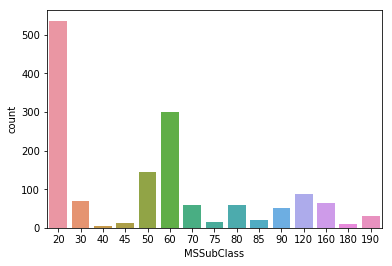

In [15]:
sns.countplot(housing['MSSubClass'])

In [16]:
housing['MSZoning'].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

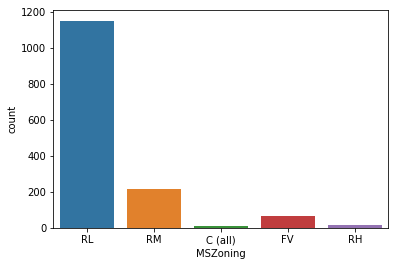

In [17]:
sns.countplot(housing['MSZoning'])

In [18]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

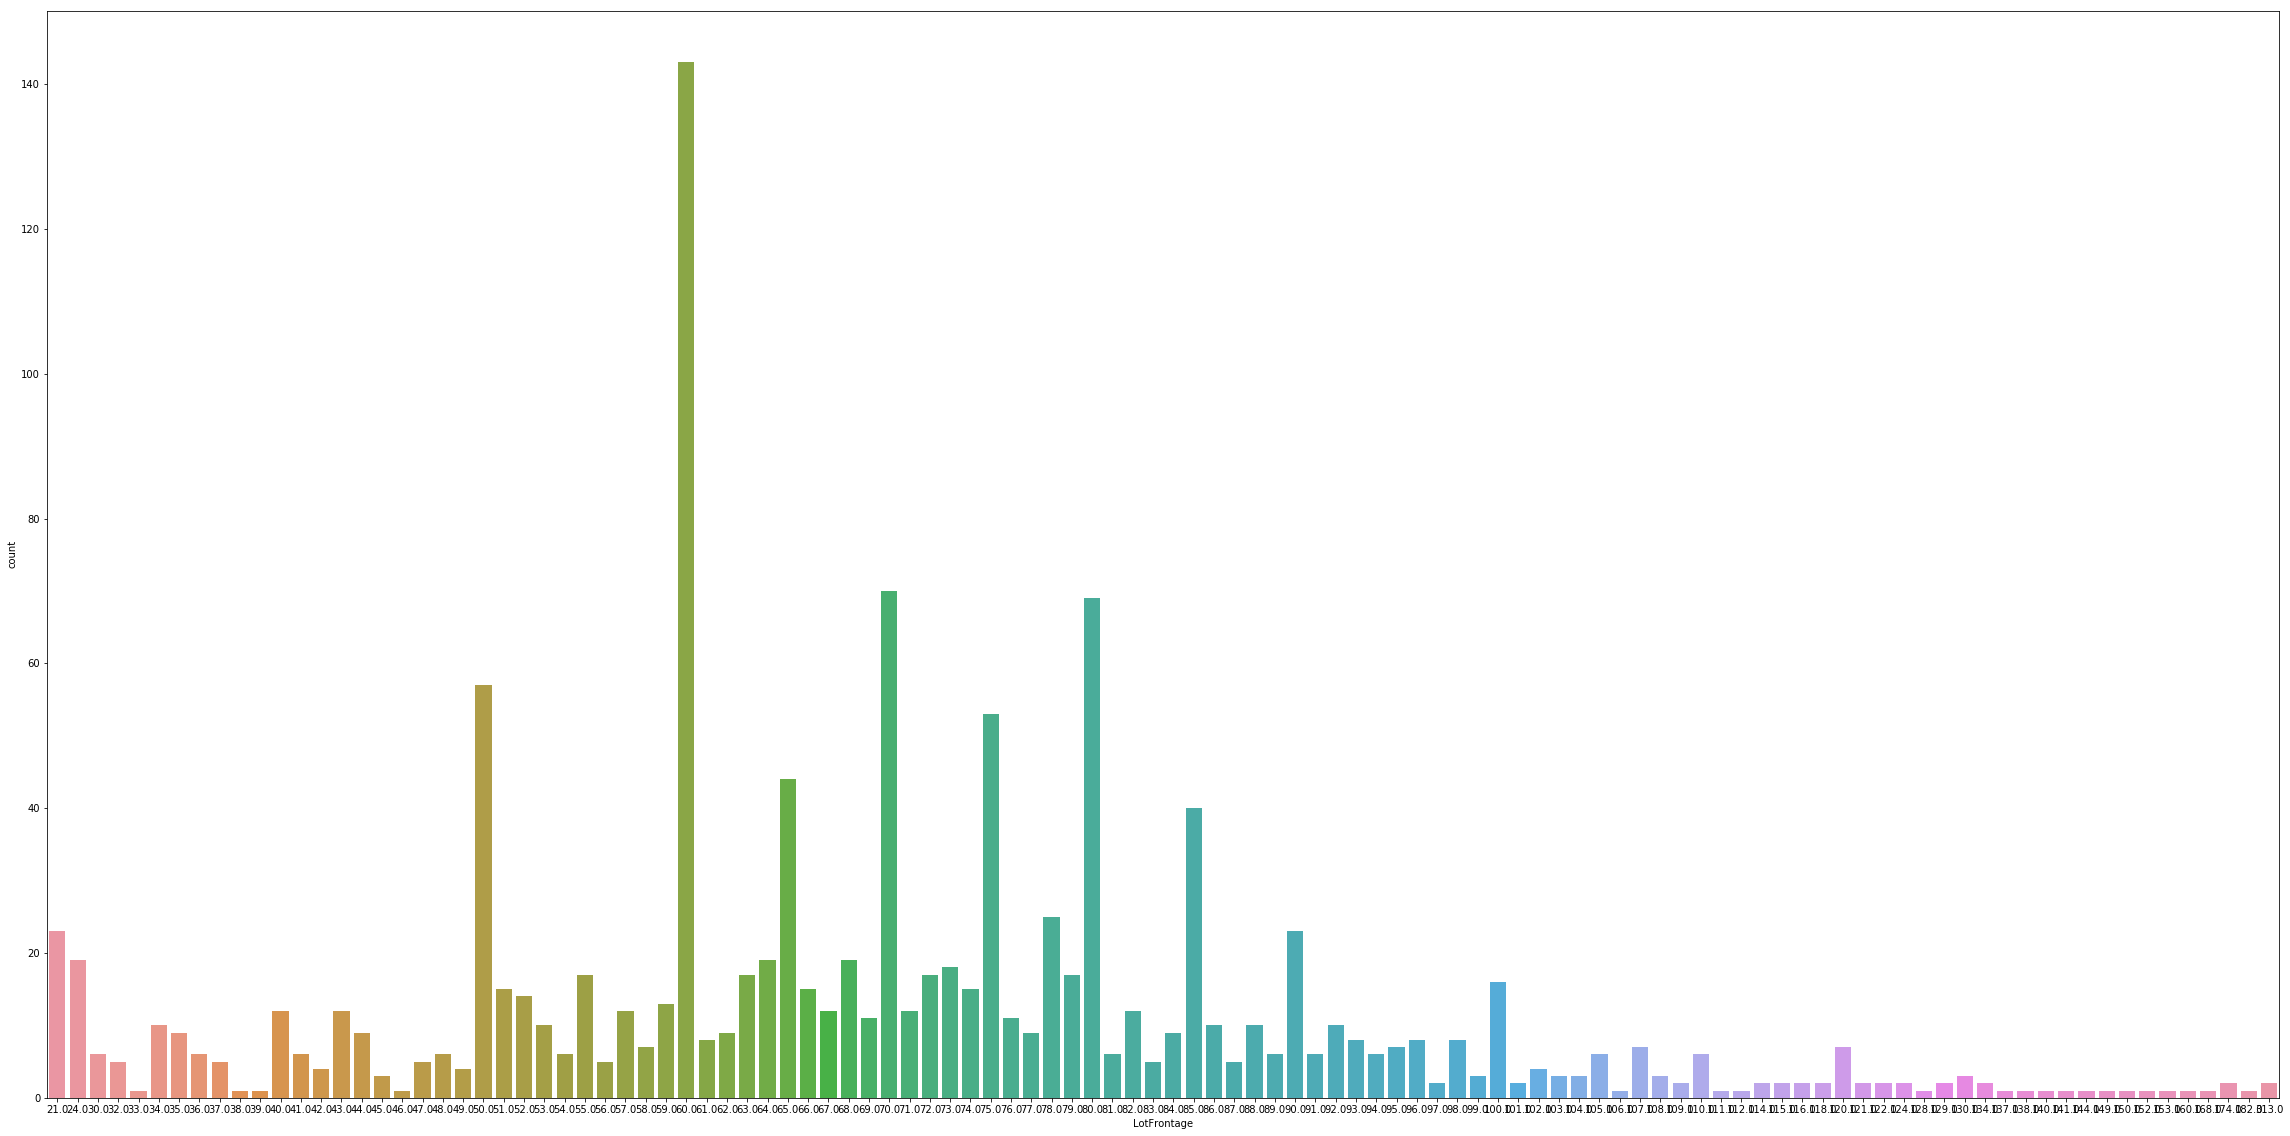

In [19]:
fig, axs = plt.subplots(figsize = (40,20))
sns.countplot(housing['LotFrontage'])

In [20]:
housing['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

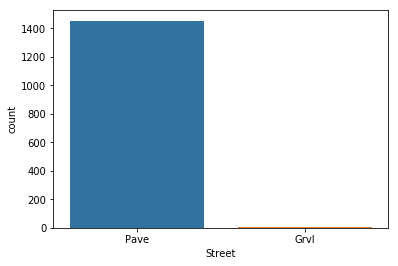

In [21]:
sns.countplot(housing['Street'])

In [22]:
housing['Street'].describe()

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object

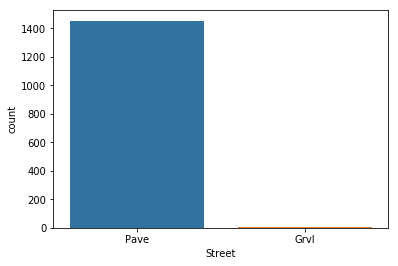

In [23]:
sns.countplot(housing['Street'])

In [24]:
housing['LotShape'].describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

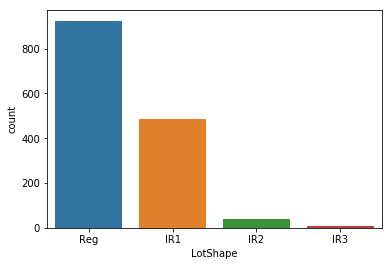

In [25]:
sns.countplot(housing['LotShape'])

In [26]:
housing['LandContour'].describe()

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object

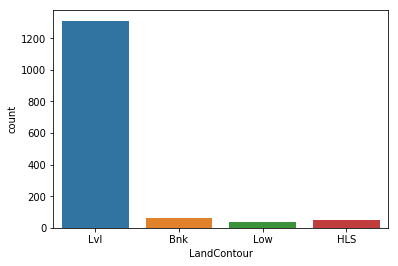

In [27]:
sns.countplot(housing['LandContour'])

In [28]:
housing['Utilities'].describe()

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object

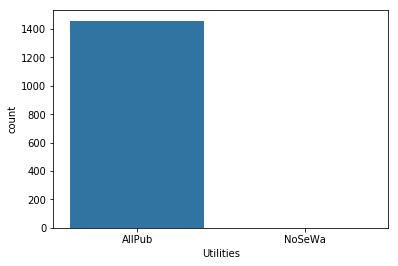

In [29]:
sns.countplot(housing['Utilities'])

In [30]:
housing['LotConfig'].describe()

count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object

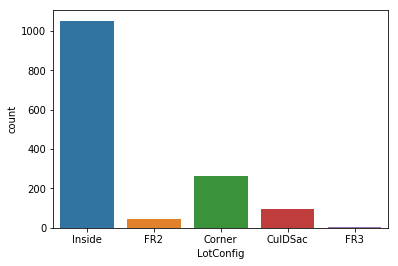

In [31]:
sns.countplot(housing['LotConfig'])

In [32]:
housing['LandSlope'].describe()

count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object

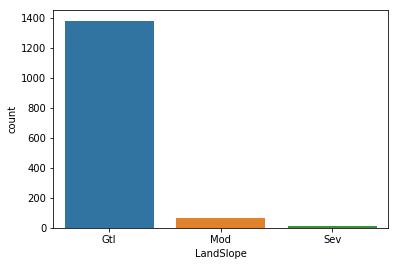

In [33]:
sns.countplot(housing['LandSlope'])

In [34]:
housing['Neighborhood'].describe()

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

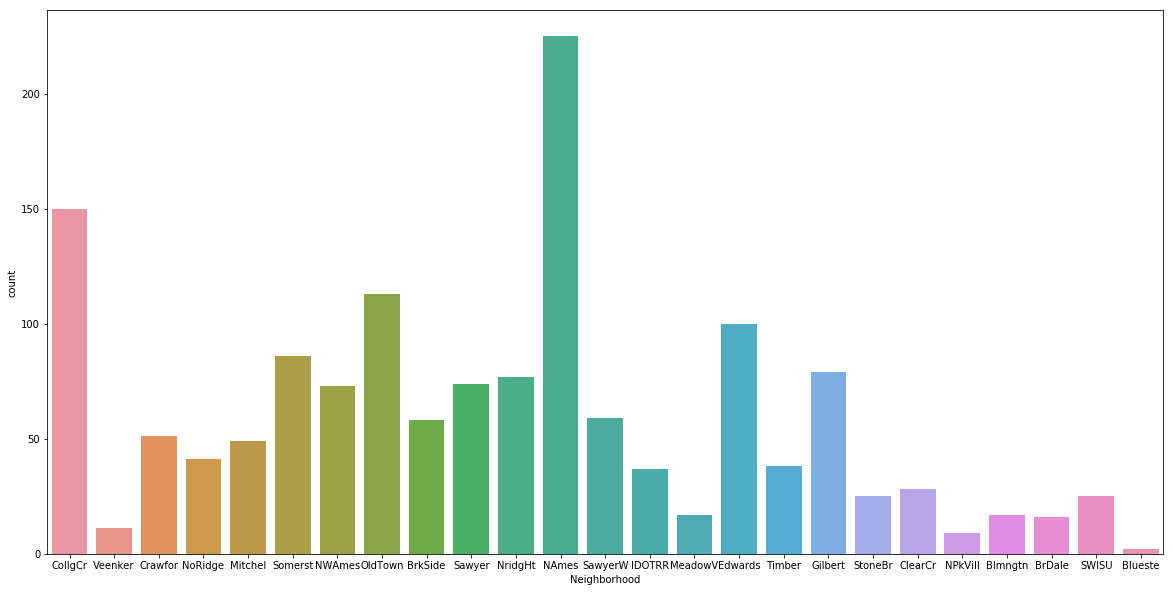

In [35]:
fig, axs = plt.subplots(figsize = (20,10))
sns.countplot(housing['Neighborhood'])


In [36]:
print(100*(housing['Neighborhood'].astype('category').value_counts()/housing['Neighborhood'].count()))
#Imputing values of the minor category levels in Neighborhood
housing['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
housing['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
housing['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
housing['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
housing['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
housing['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
housing['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
housing['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
housing['Neighborhood'].replace({'Blueste':'Others'},inplace=True)
print(100*(housing['Neighborhood'].astype('category').value_counts()/housing['Neighborhood'].count()))

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64
NAmes      15.410959
Others     10.273973
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
Name: Neighborhood, dtype: float64


In [37]:
housing['Condition1'].describe()

count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object

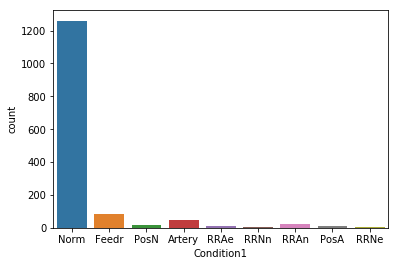

In [38]:
sns.countplot(housing['Condition1'])

In [39]:
housing['Condition2'].describe()

count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object

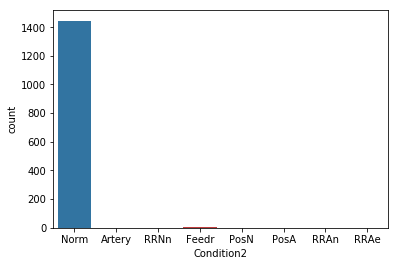

In [40]:
sns.countplot(housing['Condition2'])

In [41]:
housing['BldgType'].describe()

count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object

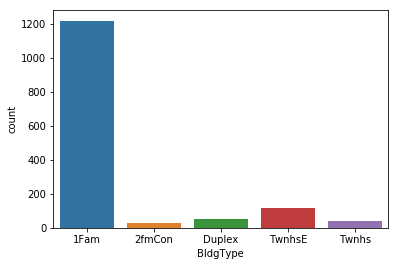

In [42]:
sns.countplot(housing['BldgType'])

In [43]:
housing['HouseStyle'].describe()

count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object

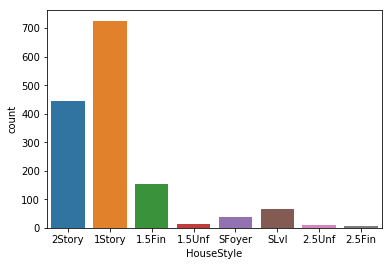

In [44]:
sns.countplot(housing['HouseStyle'])

In [45]:
housing['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

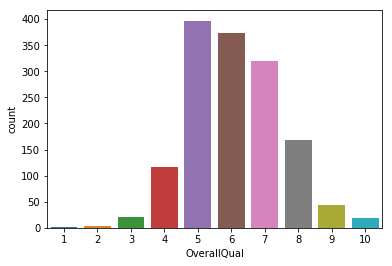

In [46]:
sns.countplot(housing['OverallQual'])

In [47]:
housing['OverallCond'].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

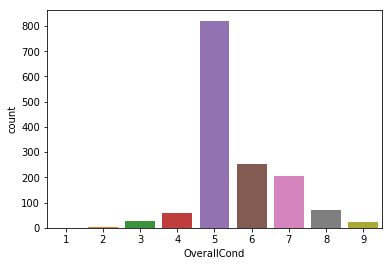

In [48]:
sns.countplot(housing['OverallCond'])

In [49]:
housing['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

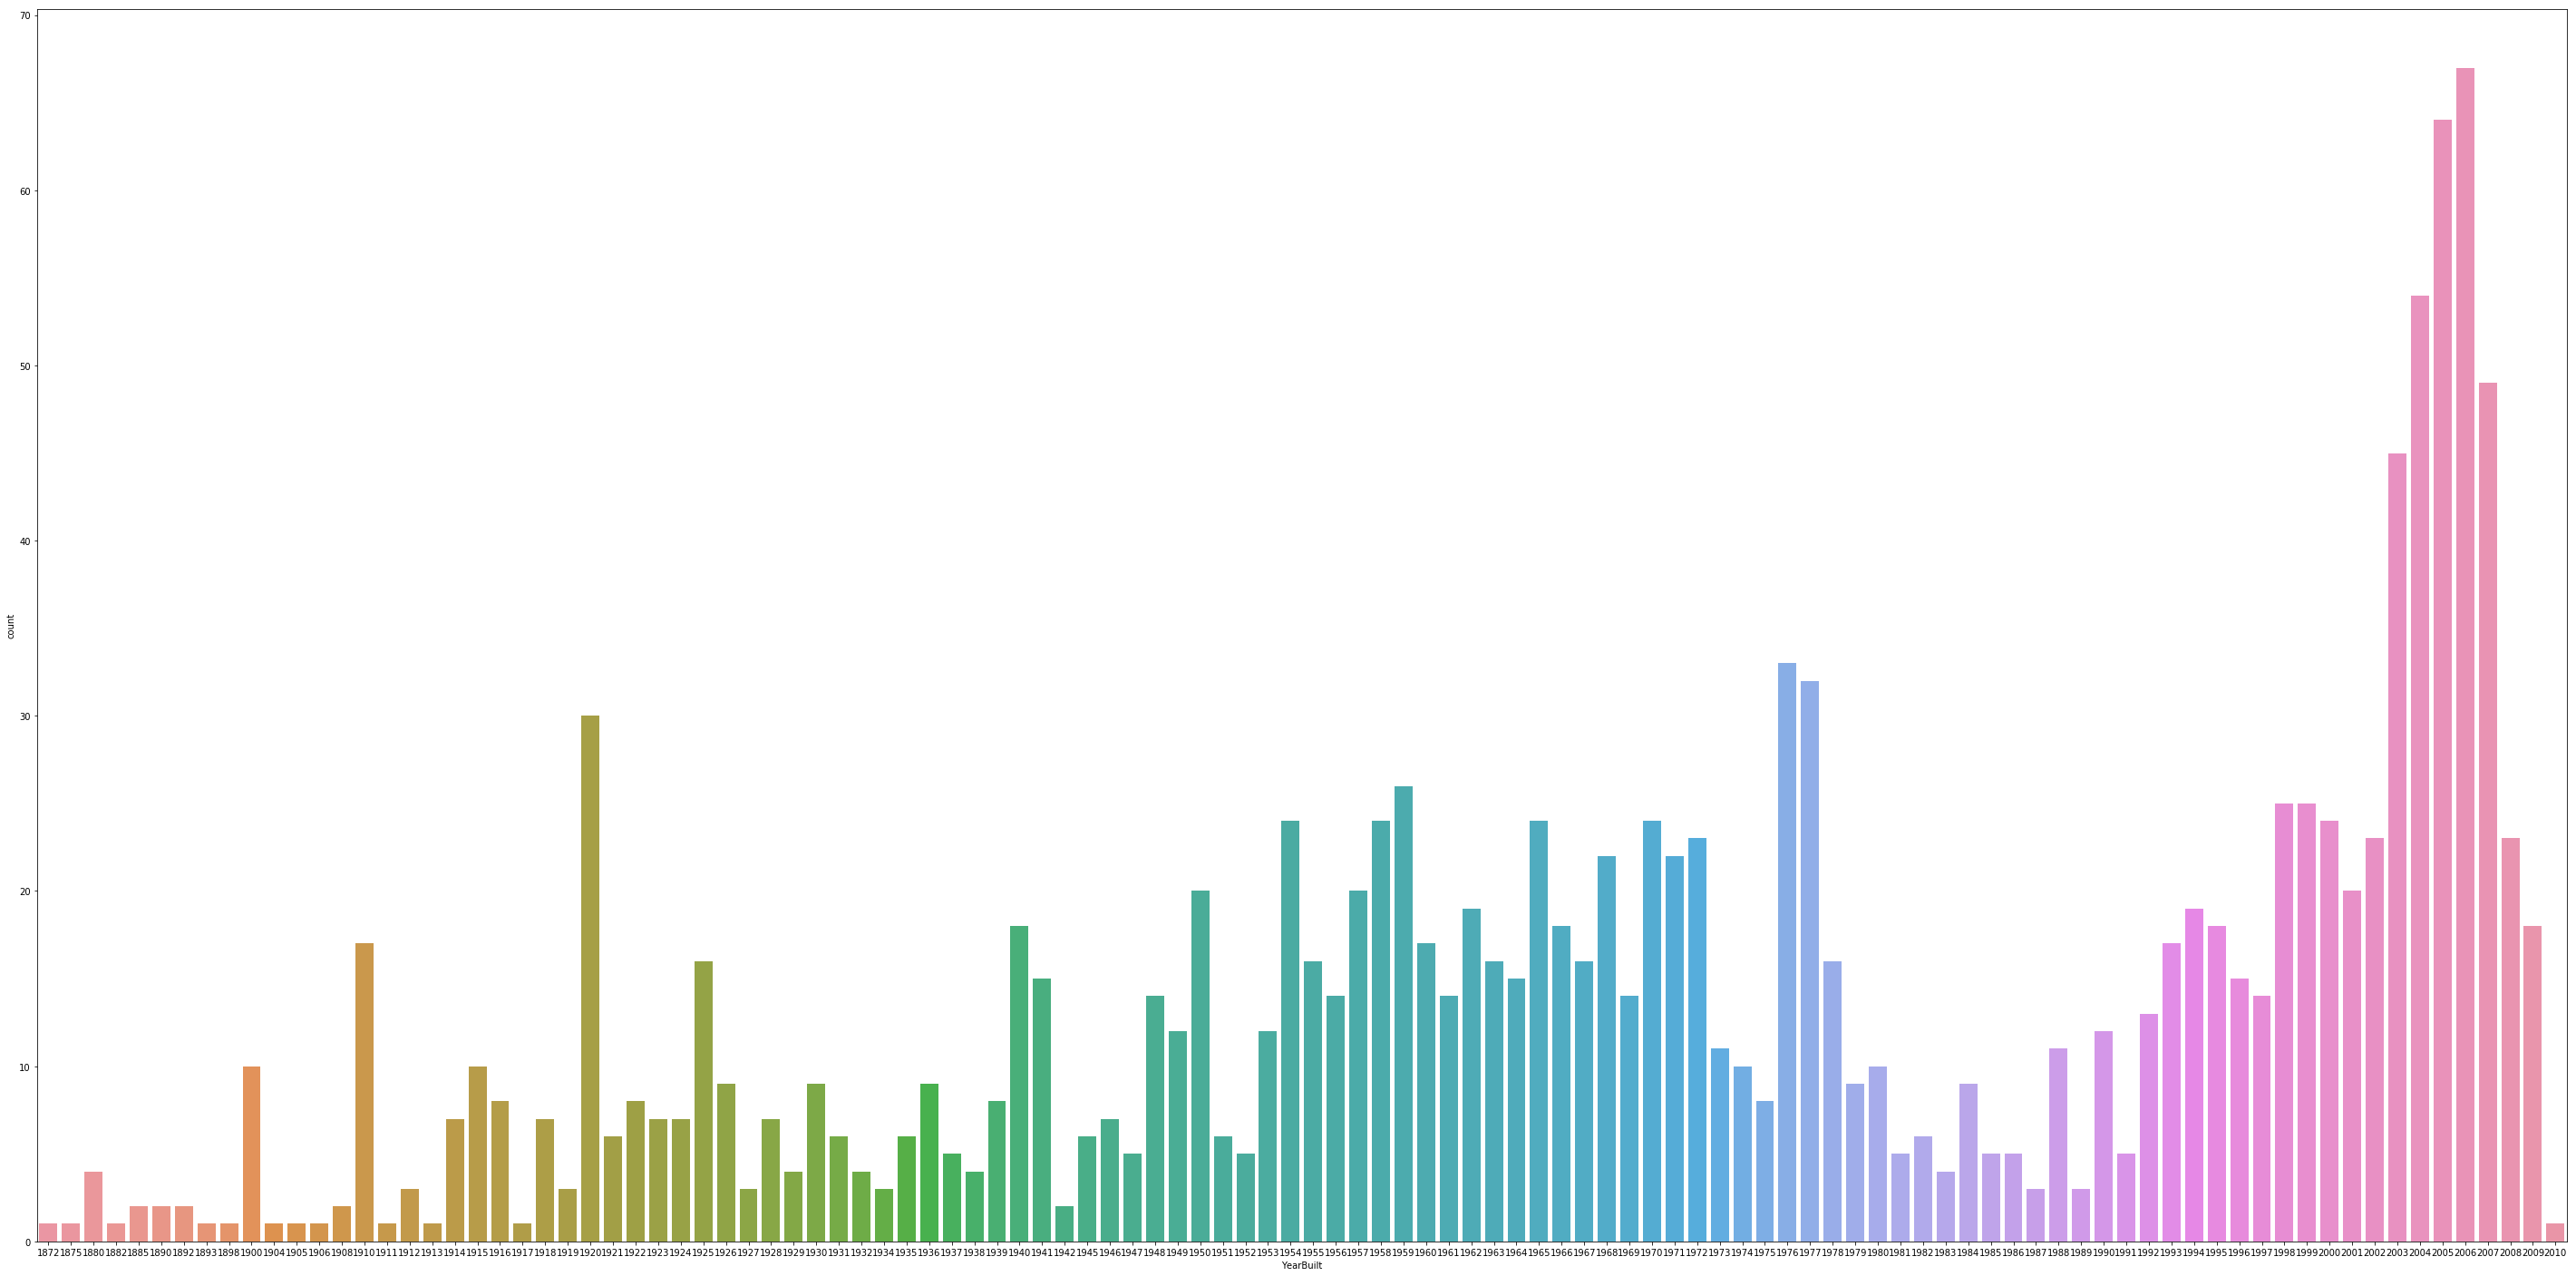

In [50]:
fig, axs = plt.subplots(figsize = (50,25))
sns.countplot(housing['YearBuilt'])

In [51]:
#Binning of the Year built variable
#Creating bins to define the year periods - 1872-1925, 1926-1950,1951-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1925,1950,1976,1991,2001,2010]
slot_names=['1872-1925','1926-1950','1951-1975','1976-1990','1991-2000','2001-2010']
housing['YearBuilt']=pd.cut(housing['YearBuilt'],bins,labels=slot_names,include_lowest=True)
print(100*(housing['YearBuilt'].value_counts()/housing['YearBuilt'].count()))

1951-1975    31.027397
2001-2010    23.561644
1991-2000    13.013699
1926-1950    12.054795
1872-1925    11.095890
1976-1990     9.246575
Name: YearBuilt, dtype: float64


In [52]:
housing['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

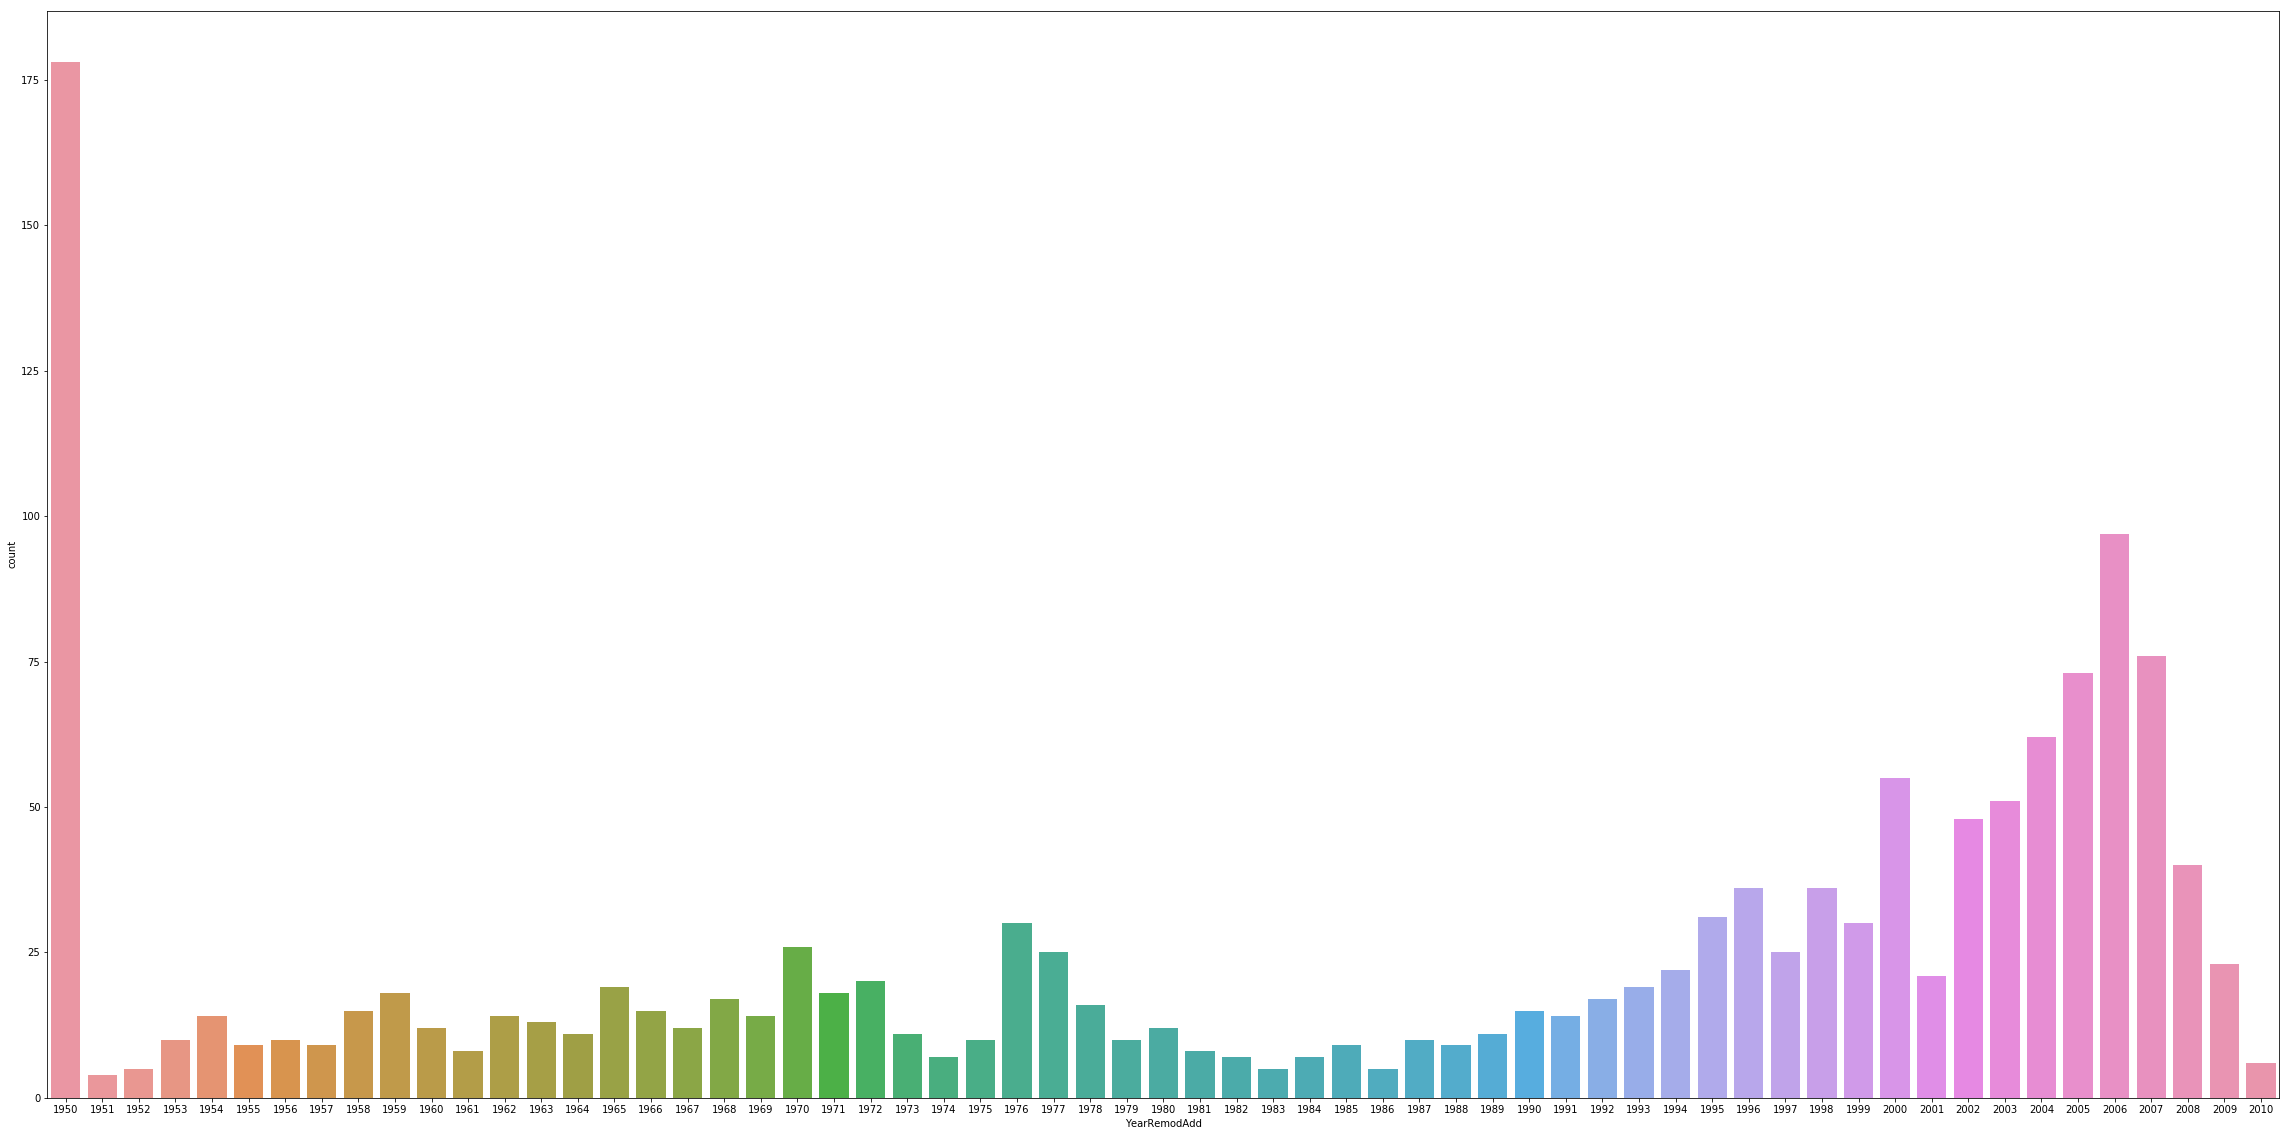

In [53]:
fig, axs = plt.subplots(figsize = (40,20))
sns.countplot(housing['YearRemodAdd'])

In [54]:
#Binning of the YearRemodAdd variable
#Creating bins to define the year periods - 1872-1925, 1926-1950,1951-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1951,1976,1991,2001,2010]
slot_names=['1872-1950','1951-1975','1976-1990','1991-2000','2001-2010']
housing['YearRemodAdd']=pd.cut(housing['YearRemodAdd'],bins,labels=slot_names,include_lowest=True)
100*(housing['YearRemodAdd'].value_counts()/housing['YearRemodAdd'].count())

2001-2010    32.602740
1951-1975    23.767123
1991-2000    20.000000
1872-1950    12.465753
1976-1990    11.164384
Name: YearRemodAdd, dtype: float64

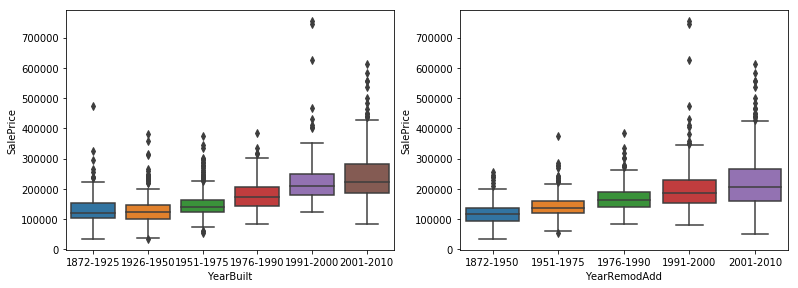

In [55]:
#Plotting the categorical variables related to Year Built and Year Remodified
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'YearRemodAdd', y = 'SalePrice', data = housing)

In [56]:
housing['RoofStyle'].describe()

count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object

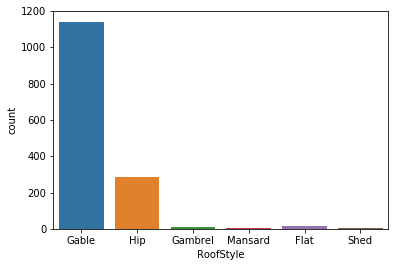

In [57]:
sns.countplot(housing['RoofStyle'])

In [58]:
housing['RoofMatl'].describe()

count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object

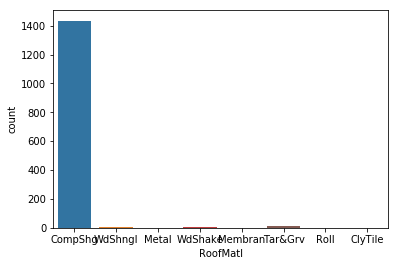

In [59]:
sns.countplot(housing['RoofMatl'])

In [60]:
housing['Exterior1st'].describe()

count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object

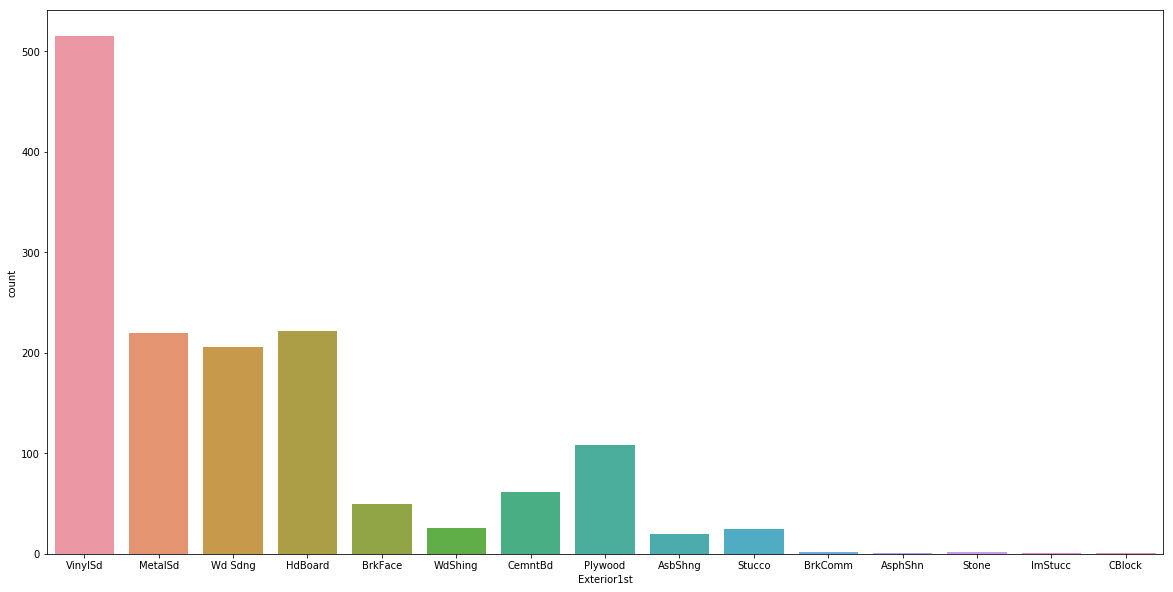

In [61]:
fig, axs = plt.subplots(figsize = (20,10))
sns.countplot(housing['Exterior1st'])

In [62]:
housing['Exterior2nd'].describe()

count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object

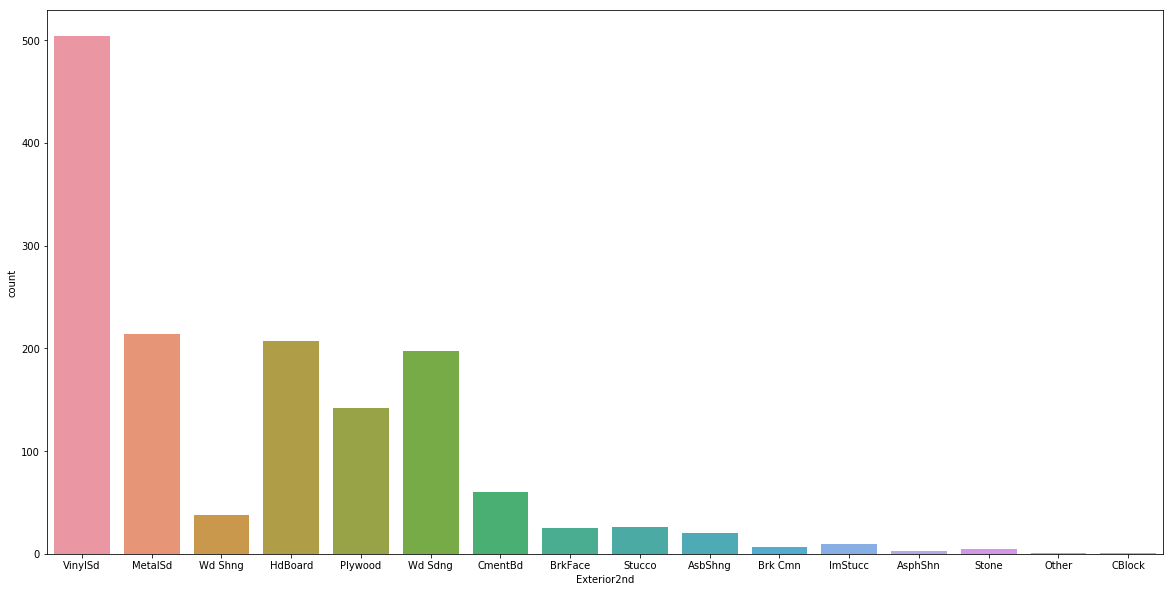

In [63]:
fig, axs = plt.subplots(figsize = (20,10))
sns.countplot(housing['Exterior2nd'])

In [64]:
housing['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

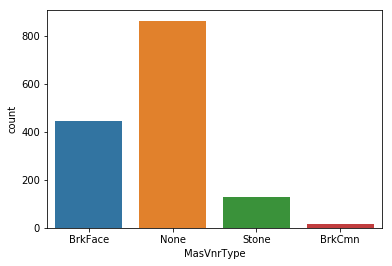

In [65]:
sns.countplot(housing['MasVnrType'])

In [66]:
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [67]:
#MasVnrArea: Masonry veneer area in square feet
100*(housing['MasVnrType'].astype('category').value_counts()/housing['MasVnrType'].count())

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

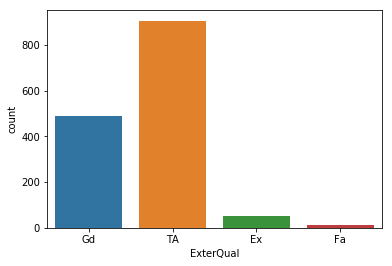

In [68]:
sns.countplot(housing['ExterQual'])

In [69]:
housing['ExterCond'].describe()

count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object

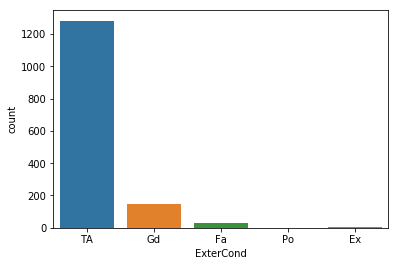

In [70]:
sns.countplot(housing['ExterCond'])

In [71]:
housing['Foundation'].describe()

count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object

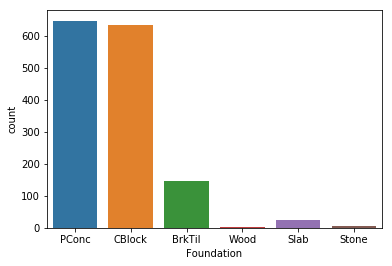

In [72]:
sns.countplot(housing['Foundation'])

In [73]:
#Cleaning up variable BsmtQual (Replacing NA => No Basement) to reduce the features
housing['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)
print(100*(housing['BsmtQual'].value_counts()/housing['BsmtQual'].count()))
# Three levels can be combined as "Others" (Fa, No BAsement, Ex)
housing['BsmtQual'].replace({'Fa':'Others'},inplace=True)
housing['BsmtQual'].replace({'Ex':'Others'},inplace=True)
housing['BsmtQual'].replace({'No Basement':'Others'},inplace=True)
print(100*(housing['BsmtQual'].value_counts()/housing['BsmtQual'].count()))

TA             44.452055
Gd             42.328767
Ex              8.287671
No Basement     2.534247
Fa              2.397260
Name: BsmtQual, dtype: float64
TA        44.452055
Gd        42.328767
Others    13.219178
Name: BsmtQual, dtype: float64


In [74]:
#Cleaning up variable BsmtCond (Replacing NA => No Basement)
housing['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
100*(housing['BsmtCond'].value_counts()/housing['BsmtCond'].count())
# Three levels of fair/good quality can be combined as OK 
housing['BsmtCond'].replace({'Fa':'OK'},inplace=True)
housing['BsmtCond'].replace({'TA':'OK'},inplace=True)
housing['BsmtCond'].replace({'Gd':'OK'},inplace=True)
# Two levels of poor quality can be combined as NOK (Po, No Basement)
housing['BsmtCond'].replace({'Po':'NOK'},inplace=True)
housing['BsmtCond'].replace({'No Basement':'NOK'},inplace=True)
print(100*(housing['BsmtCond'].value_counts()/housing['BsmtCond'].count()))

OK     97.328767
NOK     2.671233
Name: BsmtCond, dtype: float64


In [75]:
#Can be considered as single value and can be dropped from dataset
housing=housing.drop(['BsmtCond'],axis=1)

In [76]:
#Cleaning up variable BsmtExposure (Replacing NA => No Basement)
housing['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
100*(housing['BsmtExposure'].value_counts()/housing['BsmtExposure'].count())

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No Basement     2.602740
Name: BsmtExposure, dtype: float64

In [77]:
#Cleaning up variable BsmtFinType1 (Replacing NA => No Basement)
housing['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
100*(housing['BsmtFinType1'].value_counts()/housing['BsmtFinType1'].count())

Unf            29.452055
GLQ            28.630137
ALQ            15.068493
BLQ            10.136986
Rec             9.109589
LwQ             5.068493
No Basement     2.534247
Name: BsmtFinType1, dtype: float64

In [78]:
#Cleaning up variable BsmtFinType2 (Replacing NA => No Basement)
housing['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)
100*(housing['BsmtFinType2'].value_counts()/housing['BsmtFinType2'].count())

Unf            86.027397
Rec             3.698630
LwQ             3.150685
No Basement     2.602740
BLQ             2.260274
ALQ             1.301370
GLQ             0.958904
Name: BsmtFinType2, dtype: float64

In [79]:
#Let us look into the Basement related attributes to understand the correlations
housing_Basement=housing[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
housing_Basement.head()
housing_Basement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
BsmtQual        1460 non-null object
BsmtExposure    1460 non-null object
BsmtFinType1    1460 non-null object
BsmtFinType2    1460 non-null object
BsmtFinSF1      1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
dtypes: int64(4), object(4)
memory usage: 91.3+ KB


<Figure size 1440x720 with 0 Axes>

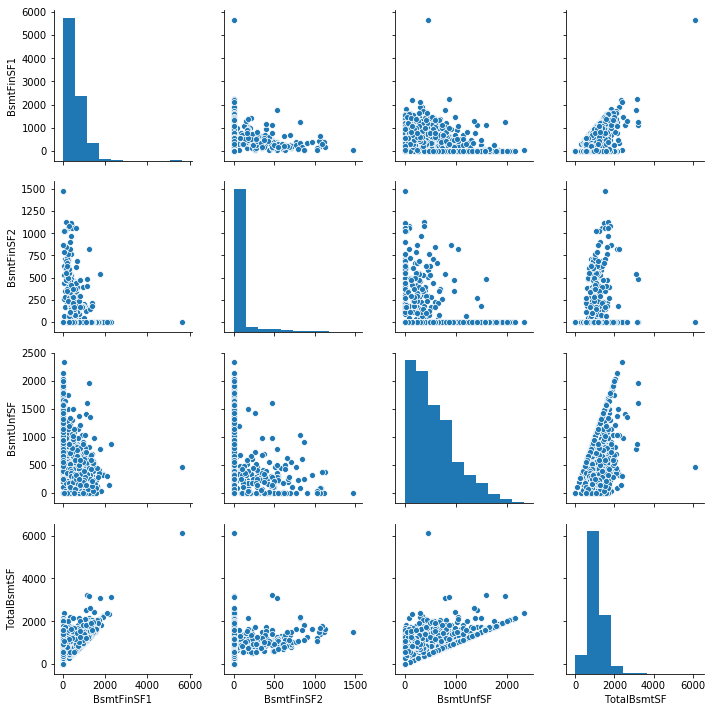

In [80]:
# pairwise scatter plot to explore Basement related attributes

plt.figure(figsize=(20, 10))
sns.pairplot(housing_Basement)
plt.show()

In [81]:
#Dropping of correlated variables and keeping only TotalBsmtSF
housing=housing.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

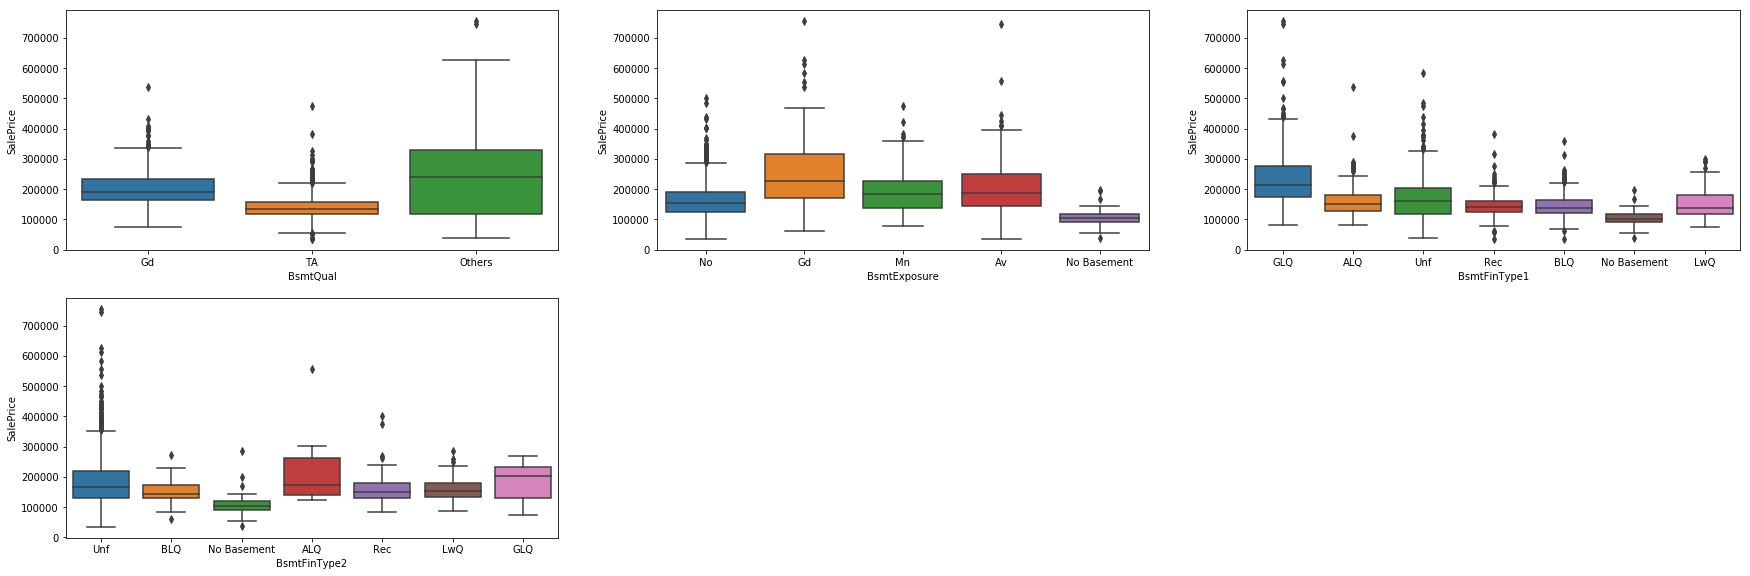

In [82]:
#Plotting the categorical variables related to Basement
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = housing)

In [83]:
#Dropping variables BsmtFinType1 and BsmtFinType2 as these dont look to have strong influence on sale price
housing=housing.drop(['BsmtFinType1','BsmtFinType2'],axis=1)

In [84]:
housing['Heating'].describe()

count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object

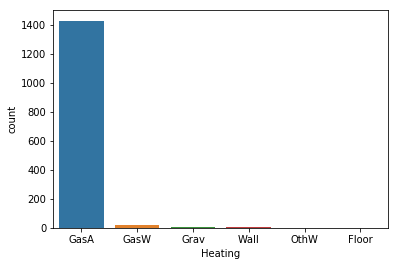

In [85]:
sns.countplot(housing['Heating'])

In [86]:
housing['HeatingQC'].describe()

count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object

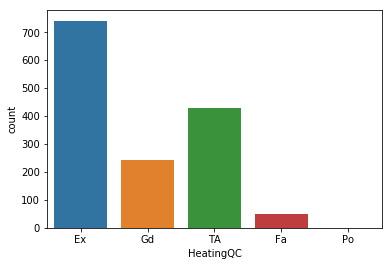

In [87]:
sns.countplot(housing['HeatingQC'])

In [88]:
housing['CentralAir'].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

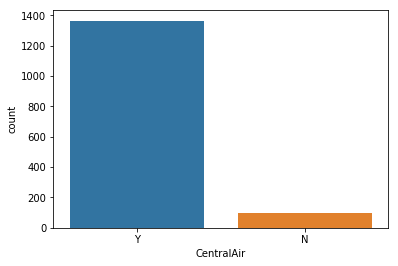

In [89]:
sns.countplot(housing['CentralAir'])

In [90]:
housing['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

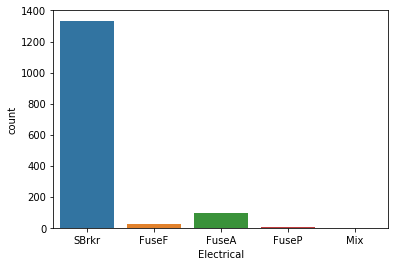

In [91]:
sns.countplot(housing['Electrical'])

In [92]:
#Replacing missing value
housing['Electrical'].replace({np.nan:'Unknown'},inplace=True)
print(100*(housing['Electrical'].value_counts()/housing['Electrical'].count()))
#Imputing the minor category levels of Electrical
housing['Electrical'].replace({'FuseA':'Other'},inplace=True)
housing['Electrical'].replace({'FuseF':'Other'},inplace=True)
housing['Electrical'].replace({'FuseP':'Other'},inplace=True)
housing['Electrical'].replace({'Mix':'Other'},inplace=True)
housing['Electrical'].replace({'Unknown':'Other'},inplace=True)
print(100*(housing['Electrical'].value_counts()/housing['Electrical'].count()))

SBrkr      91.369863
FuseA       6.438356
FuseF       1.849315
FuseP       0.205479
Unknown     0.068493
Mix         0.068493
Name: Electrical, dtype: float64
SBrkr    91.369863
Other     8.630137
Name: Electrical, dtype: float64


In [93]:
housing['KitchenQual'].describe()

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

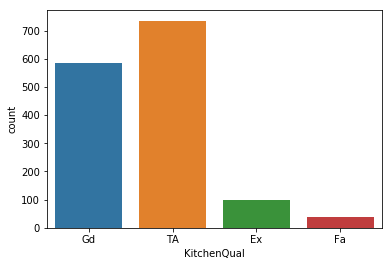

In [94]:
sns.countplot(housing['KitchenQual'])

In [95]:
housing['Functional'].describe()

count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object

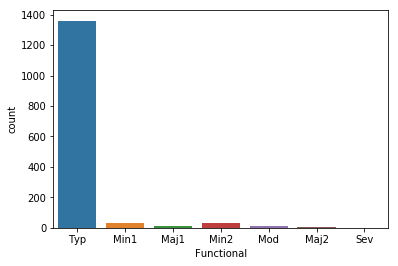

In [96]:
sns.countplot(housing['Functional'])

In [97]:
#Cleaning up variable GarageType (Replacing NA => No Garage)
housing['GarageType'].replace({np.nan:'No Garage'},inplace=True)
100*(housing['GarageType'].value_counts()/housing['GarageType'].count())

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [98]:
#Cleaning up variable GarageFinish (Replacing NA => No Garage)
housing['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
100*(housing['GarageFinish'].value_counts()/housing['GarageFinish'].count())

Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64

In [99]:
#Cleaning up variable GarageQual (Replacing NA => No Garage)
housing['GarageQual'].replace({np.nan:'No Garage'},inplace=True)
print(100*(housing['GarageQual'].value_counts()/housing['GarageQual'].count()))
#Imputing level values of GarageQual
housing['GarageQual'].replace({'TA':'OK Garage'},inplace=True)
housing['GarageQual'].replace({'Fa':'OK Garage'},inplace=True)
housing['GarageQual'].replace({'Gd':'OK Garage'},inplace=True)
housing['GarageQual'].replace({'Ex':'OK Garage'},inplace=True)
housing['GarageQual'].replace({'Po':'No Garage'},inplace=True)
print(100*(housing['GarageQual'].value_counts()/housing['GarageQual'].count()))

TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Po            0.205479
Ex            0.205479
Name: GarageQual, dtype: float64
OK Garage    94.246575
No Garage     5.753425
Name: GarageQual, dtype: float64


In [100]:
#Cleaning up variable GarageCond (Replacing NA => No Garage)
housing['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
print(100*(housing['GarageCond'].value_counts()/housing['GarageCond'].count()))
#Imputing level values of GarageCond
housing['GarageCond'].replace({'TA':'OK'},inplace=True)
housing['GarageCond'].replace({'Fa':'OK'},inplace=True)
housing['GarageCond'].replace({'Gd':'OK'},inplace=True)
housing['GarageCond'].replace({'Ex':'OK'},inplace=True)
housing['GarageCond'].replace({'Po':'No Garage'},inplace=True)
print(100*(housing['GarageCond'].value_counts()/housing['GarageCond'].count()))

TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64
OK           93.972603
No Garage     6.027397
Name: GarageCond, dtype: float64


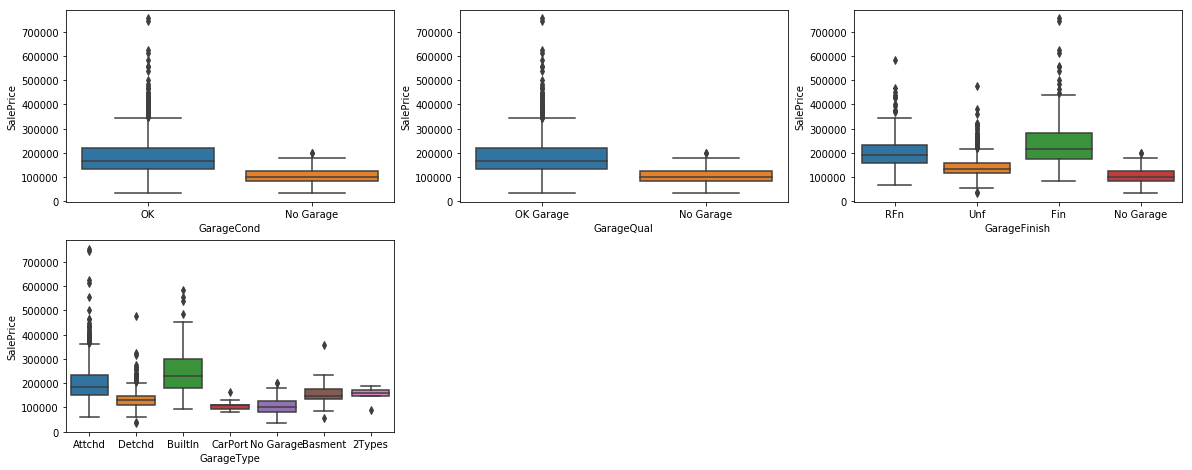

In [101]:
#Plotting the categorical variables related to Garage and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing)

In [102]:
#GarageCond and GarageQual seem to be same in influence on SalePrice, one can be dropped
housing=housing.drop(['GarageQual'],axis=1)
#Garage type - CarPort, No Garage, Basement, 2Types can be combined as "Others"
#Imputing values to "Others"
housing['GarageType'].replace({'CarPort':'No Garage'},inplace=True)
housing['GarageType'].replace({'Basment':'No Garage'},inplace=True)
housing['GarageType'].replace({'No Garage':'No Garage'},inplace=True)
housing['GarageType'].replace({'2Types':'No Garage'},inplace=True)
print(100*(housing['GarageType'].value_counts()/housing['GarageType'].count()))

Attchd       59.589041
Detchd       26.506849
No Garage     7.876712
BuiltIn       6.027397
Name: GarageType, dtype: float64


   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
0           61              0          0            0
1            0              0          0            0
2           42              0          0            0
3           35            272          0            0
4           84              0          0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
dtypes: int64(4)
memory usage: 45.7 KB
None


<Figure size 720x720 with 0 Axes>

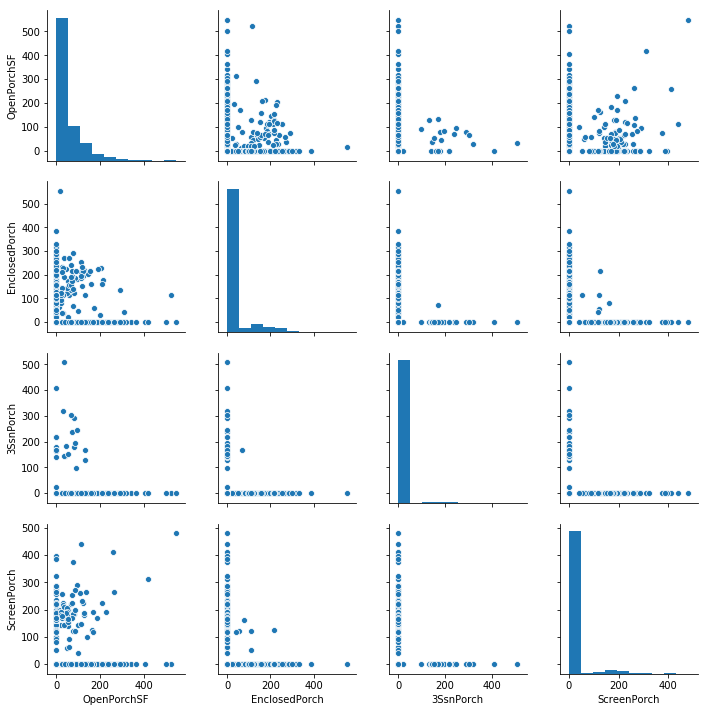

In [103]:
#Let us look into into the porch related attributes to understand the correlations
housing_Porch=housing[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]
print(housing_Porch.head())
print(housing_Porch.info())
# pairwise scatter plot
plt.figure(figsize=(10, 10))
sns.pairplot(housing_Porch)
plt.show()

In [104]:
#Retaining Open Porch and Enclosed Porch to capture the key attributes
housing=housing.drop(['ScreenPorch','3SsnPorch'],axis=1)


In [105]:
# percentage of missing values in each column
round(housing.isnull().sum()/len(housing.index), 2)*100

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
Street            0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        1.0
MasVnrArea        1.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
GrLivArea         0.0
BsmtFullBath      0.0
BsmtHalfBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenAbv

In [106]:
# missing values in rows
housing.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      0
11      0
12      1
13      0
14      1
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      0
30      0
31      1
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      1
40      0
41      0
42      1
43      1
44      0
45      0
46      0
47      0
48      1
49      0
50      1
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      0
66      1
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      1
77      0
78      1
79      0
80      0
81      0
82      0
83      0
84      1
85      0
86      0
87      0
88      1
89      1
90      0
91      0
92      0
93      0
94      0
95      1
96      0
97      0
98      0
99      1


In [107]:
#Converting the binned year columns as object datatype
housing['YearBuilt']=housing['YearBuilt'].values.astype(np.object)
housing['YearRemodAdd']=housing['YearRemodAdd'].values.astype(np.object)

In [108]:
#Cleaning up variable LotFrontage (Replacing NA => 0)
housing['LotFrontage'].replace({np.nan:'0'},inplace=True)
housing['LotFrontage']=housing['LotFrontage'].values.astype(np.int64)
100*(housing['LotFrontage'].value_counts()/housing['LotFrontage'].count())
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [109]:
# checking whether some rows have more than 1 missing values
len(housing[housing.isnull().sum(axis=1) > 1].index)

8

In [110]:
#Dropping column MasVnrarea and LotFrontage as these are not adding value
housing=housing.drop(['MasVnrArea','LotFrontage'],axis=1)

In [111]:
# percentage of missing values in each column
round(housing.isnull().sum()/len(housing.index), 2)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       1.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces   

In [112]:
#MasVnrArea: Masonry veneer area in square feet
100*(housing['MasVnrType'].astype('category').value_counts()/housing['MasVnrType'].count())

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

In [113]:
# As it is same as Year Built
housing=housing.drop(['GarageYrBlt'],axis=1)

In [114]:
#NULL Rows in MasVnrType 
housing=housing.dropna(how='any',axis=0)

In [115]:
# percentage of missing values in each column
round(housing.isnull().sum()/len(housing.index), 2)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces   

In [116]:
#finding uniqness in records we see there is no attribute column with a single value
housing.nunique().sort_values(ascending =True)

GarageCond          2
Street              2
CentralAir          2
Electrical          2
Utilities           2
PavedDrive          3
BsmtQual            3
LandSlope           3
BsmtHalfBath        3
HalfBath            3
KitchenQual         4
BsmtFullBath        4
FullBath            4
ExterQual           4
MasVnrType          4
Fireplaces          4
GarageType          4
GarageFinish        4
LandContour         4
LotShape            4
KitchenAbvGr        4
YrSold              5
GarageCars          5
ExterCond           5
HeatingQC           5
BsmtExposure        5
MSZoning            5
LotConfig           5
YearRemodAdd        5
BldgType            5
Foundation          6
Heating             6
SaleCondition       6
RoofStyle           6
YearBuilt           6
Functional          7
Condition2          8
BedroomAbvGr        8
HouseStyle          8
PoolArea            8
RoofMatl            8
SaleType            9
Condition1          9
OverallCond         9
OverallQual        10
MoSold    

In [117]:
housing.shape

(1452, 64)

In [118]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0   1          60     8450            7            5          856       856   
1   2          20     9600            6            8         1262      1262   
2   3          60    11250            7            5          920       920   
3   4          70     9550            7            5          756       961   
4   5          60    14260            8            5         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  MiscVal  \
0         548           0           61              0         0        0   
1         460         298            0              0         0        0   
2         608           0           42              0         0        0   
3         642           0           35            272         0        0   
4         836         192           84              0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000

In [119]:
# dropping ID column 
housing_numeric = housing_numeric.drop(['Id'], axis=1)
housing_numeric.head()

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0          60     8450            7            5          856       856   
1          20     9600            6            8         1262      1262   
2          60    11250            7            5          920       920   
3          70     9550            7            5          756       961   
4          60    14260            8            5         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  MiscVal  \
0         548           0           61              0         0        0   
1         460         298            0              0         0        0   
2         608           0           42              0         0        0   
3         642           0           35            272         0        0   
4         836         192           84              0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000

<Figure size 1440x720 with 0 Axes>

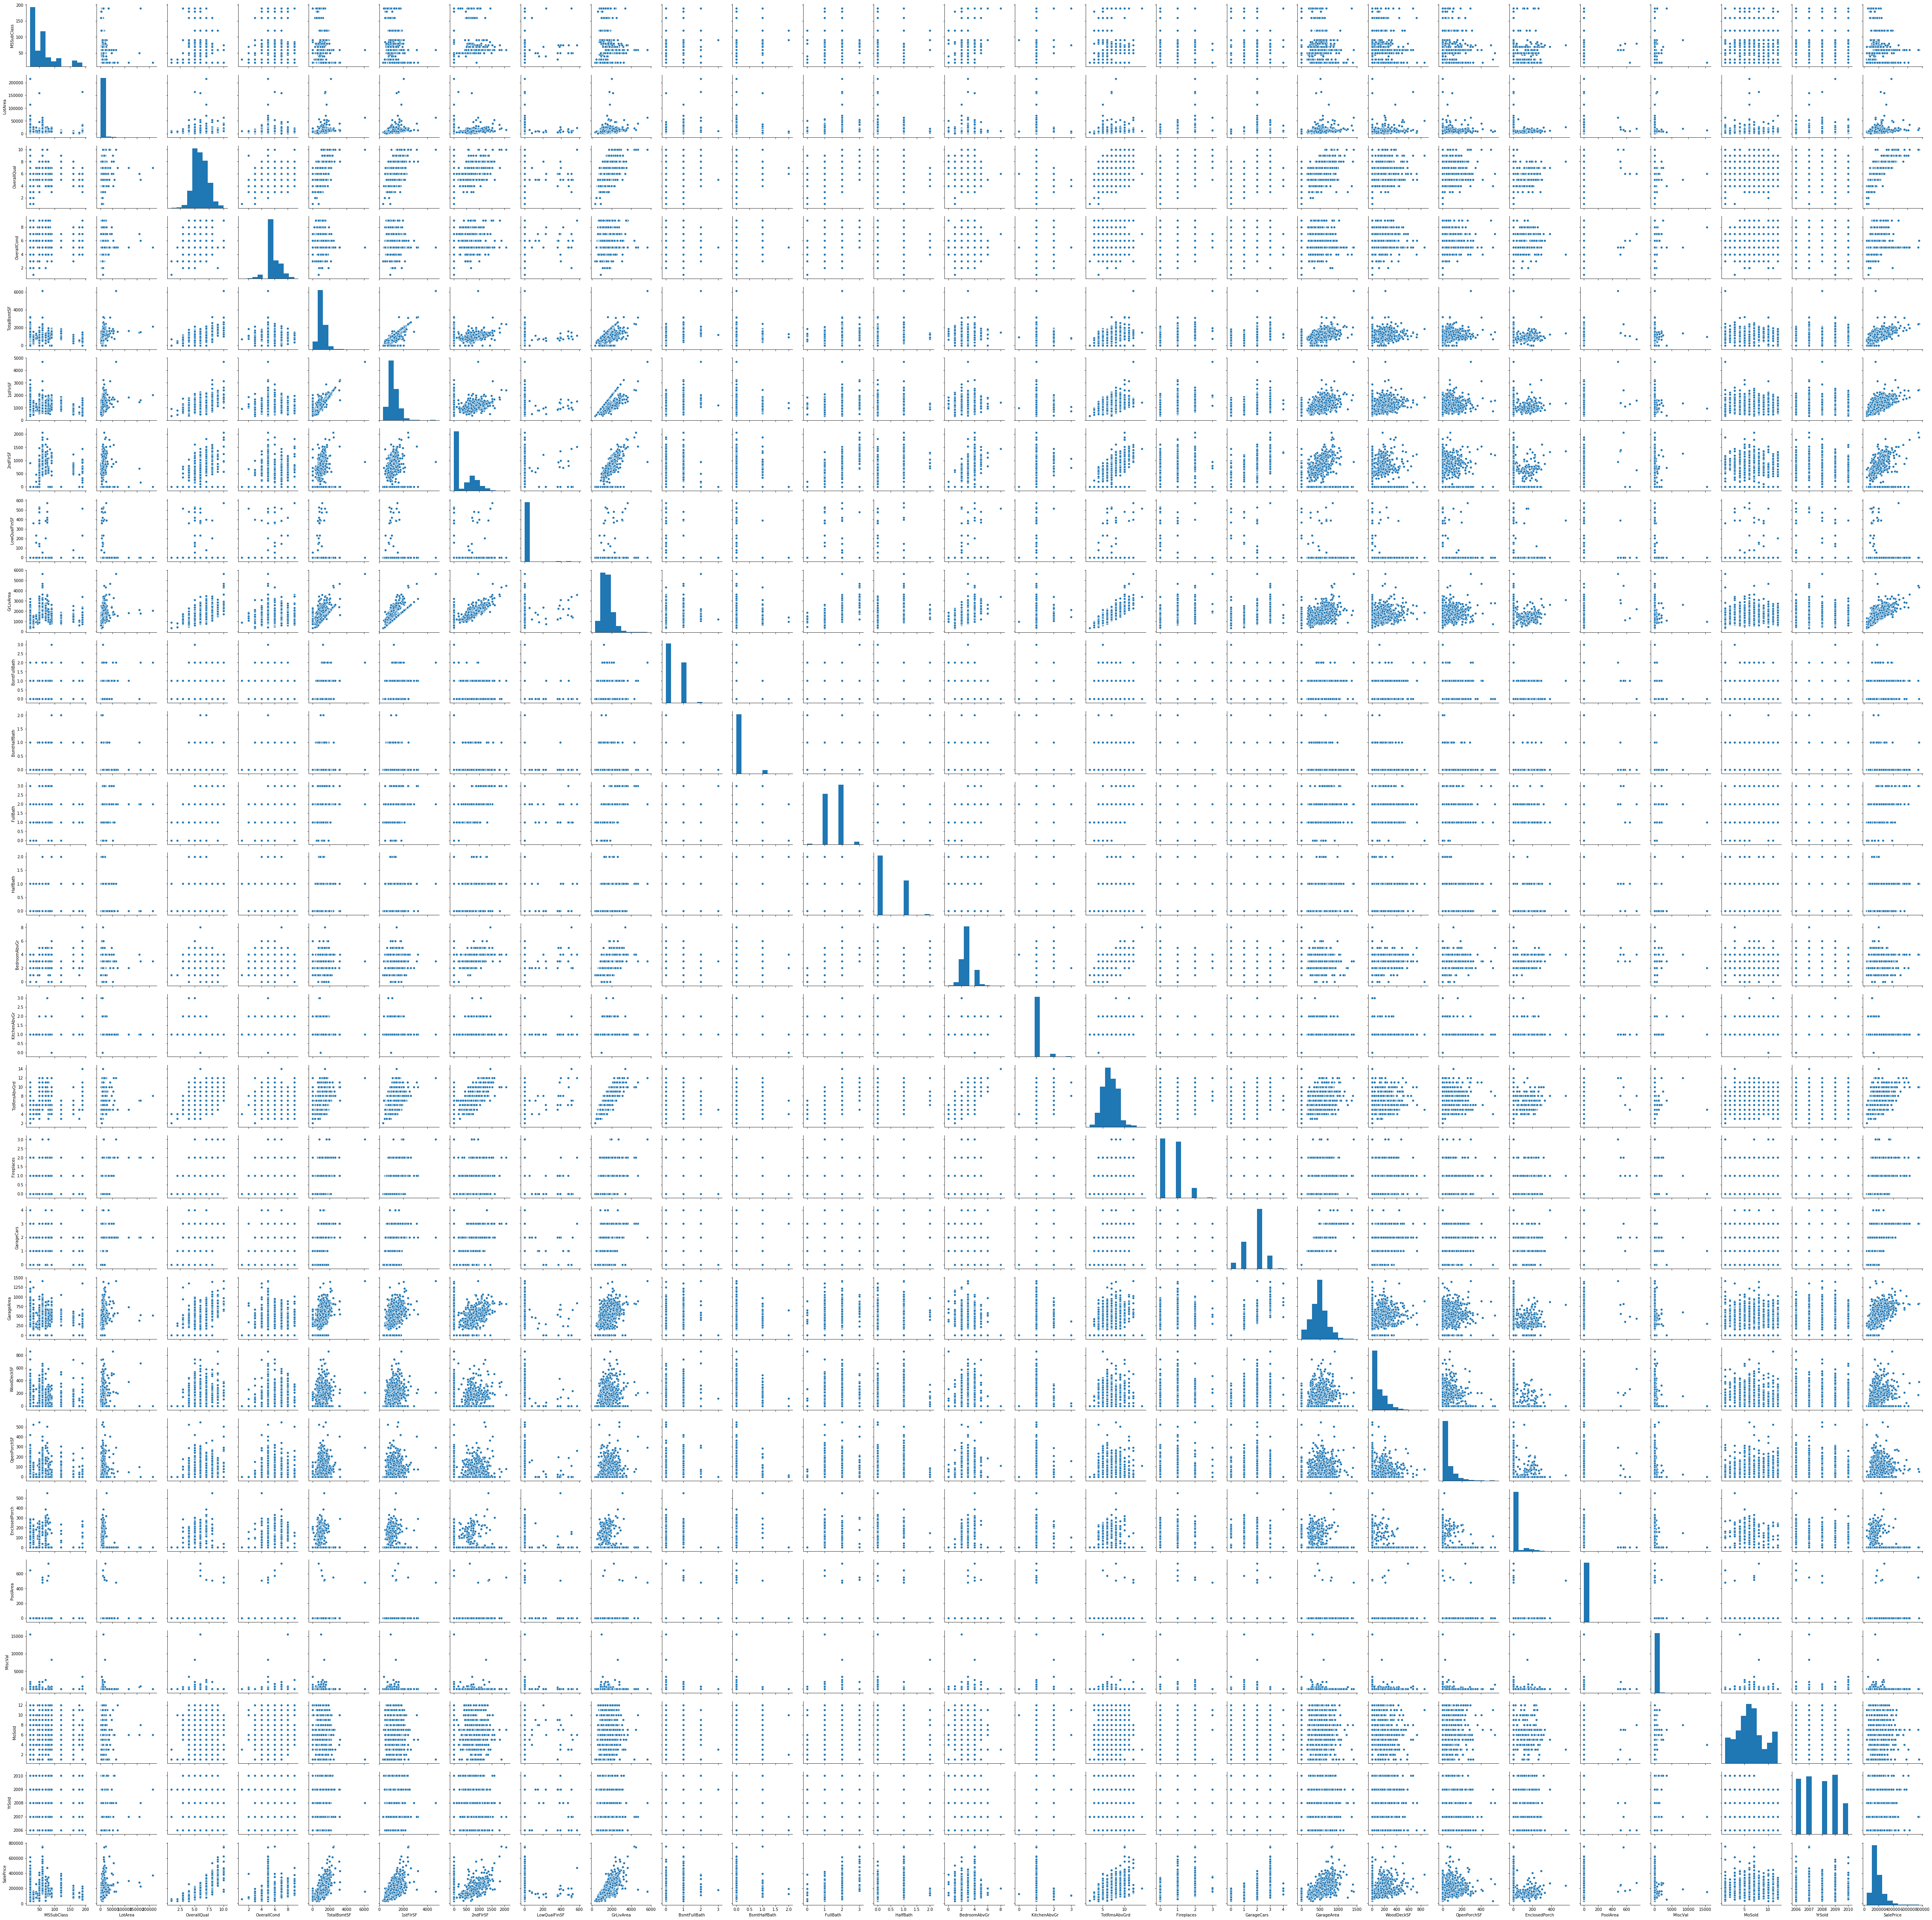

In [120]:
# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(housing_numeric)
plt.show()

In [121]:
# correlation matrix
cor = housing_numeric.corr()
cor

MSSubClass   LotArea  OverallQual  OverallCond  TotalBsmtSF  \
MSSubClass       1.000000 -0.138054     0.034491    -0.061330    -0.236906   
LotArea         -0.138054  1.000000     0.106324    -0.002269     0.258409   
OverallQual      0.034491  0.106324     1.000000    -0.090628     0.537122   
OverallCond     -0.061330 -0.002269    -0.090628     1.000000    -0.167230   
TotalBsmtSF     -0.236906  0.258409     0.537122    -0.167230     1.000000   
1stFlrSF        -0.250050  0.295919     0.476936    -0.138814     0.818246   
2ndFlrSF         0.308104  0.052935     0.298543     0.027473    -0.171603   
LowQualFinSF     0.046413  0.004904    -0.029998     0.025140    -0.032947   
GrLivArea        0.076930  0.261159     0.594417    -0.076541     0.453840   
BsmtFullBath     0.003807  0.157702     0.108505    -0.051567     0.305902   
BsmtHalfBath    -0.002633  0.048377    -0.039207     0.117290     0.000558   
FullBath         0.136306  0.122457     0.552266    -0.190396     0.321206   
HalfBath         0.176165  0.016290     0.271466    -0.061434    -0.049017   
BedroomAbvGr    -0.021651  0.117778     0.105900     0.014274     0.051665   
KitchenAbvGr     0.286572 -0.024697    -0.184642    -0.081254    -0.075885   
TotRmsAbvGrd     0.042406  0.187990     0.430549    -0.055964     0.285760   
Fireplaces      -0.044466  0.269643     0.400398    -0.020120     0.339471   
GarageCars      -0.039043  0.154739     0.599734    -0.184866     0.433601   
GarageArea      -0.098141  0.180778     0.560543    -0.151062     0.486242   
WoodDeckSF      -0.012634  0.173167     0.240652    -0.004530     0.234182   
OpenPorchSF     -0.005462  0.086301     0.303482    -0.031172     0.244914   
EnclosedPorch   -0.010571 -0.023094    -0.112950     0.074731    -0.099915   
PoolArea         0.008214  0.077888     0.065743    -0.002229     0.126820   
MiscVal         -0.007805  0.038226    -0.031129     0.068642    -0.018237   
MoSold          -0.013840  0.003203     0.068760    -0.004034     0.011558   
YrSold          -0.021529 -0.012977    -0.025186     0.043433    -0.011451   
SalePrice       -0.082813  0.264674     0.789997    -0.076294     0.612971   

               1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
MSSubClass    -0.250050  0.308104      0.046413   0.076930      0.003807   
LotArea        0.295919  0.052935      0.004904   0.261159      0.157702   
OverallQual    0.476936  0.298543     -0.029998   0.594417      0.108505   
OverallCond   -0.138814  0.027473      0.025140  -0.076541     -0.051567   
TotalBsmtSF    0.818246 -0.171603     -0.032947   0.453840      0.305902   
1stFlrSF       1.000000 -0.199194     -0.013914   0.565833      0.242908   
2ndFlrSF      -0.199194  1.000000      0.063566   0.690178     -0.170202   
LowQualFinSF  -0.013914  0.063566      1.000000   0.135336     -0.046871   
GrLivArea      0.565833  0.690178      0.135336   1.000000      0.032281   
BsmtFullBath   0.242908 -0.170202     -0.046871   0.032281      1.000000   
BsmtHalfBath   0.002821 -0.023906     -0.006002  -0.018337     -0.147505   
FullBath       0.377828  0.424294     -0.000187   0.628983     -0.067707   
HalfBath      -0.119564  0.610154     -0.026848   0.416473     -0.033429   
BedroomAbvGr   0.128330  0.502960      0.105932   0.521379     -0.150410   
KitchenAbvGr   0.058731  0.062403      0.007809   0.095550     -0.044654   
TotRmsAbvGrd   0.410224  0.617677      0.131541   0.825476     -0.053993   
Fireplaces     0.410347  0.193682     -0.021231   0.459400      0.135155   
GarageCars     0.439550  0.185412     -0.094276   0.467149      0.130329   
GarageArea     0.490877  0.139861     -0.067410   0.469423      0.177942   
WoodDeckSF     0.238699  0.090962     -0.025669   0.247981      0.175778   
OpenPorchSF    0.210625  0.210512      0.018852   0.330795      0.063937   
EnclosedPorch -0.072610  0.064217      0.061314   0.005813     -0.051483   
PoolArea       0.132669  0.081749      0.062115   0.170808      0.068057   
MiscVa

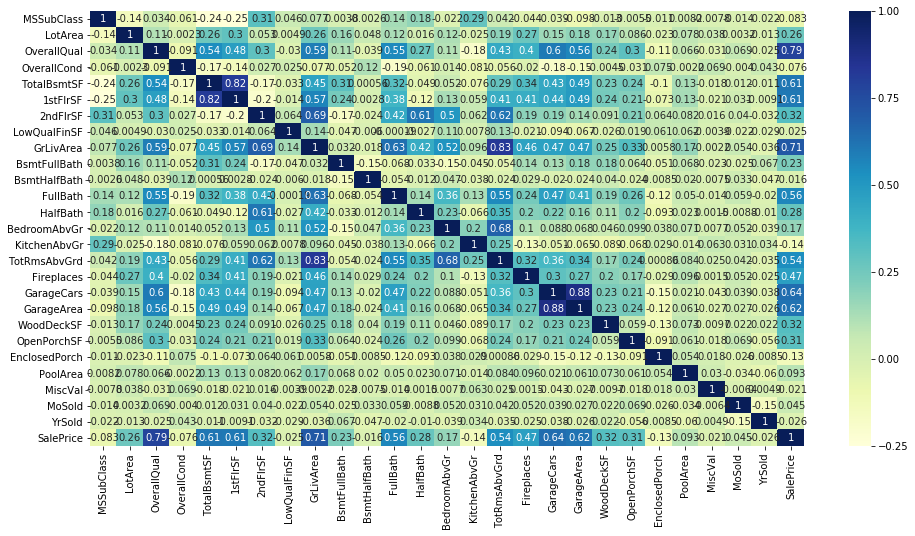

In [122]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

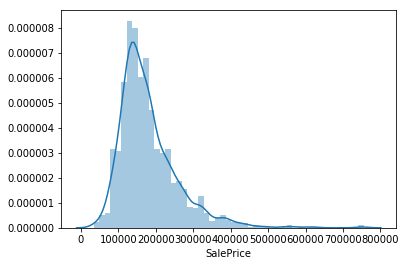

In [123]:
#Target variable: sale price of house
# SalePrice is normally distributed
sns.distplot(housing['SalePrice'])
plt.show()


In [124]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 64 columns):
Id               1452 non-null int64
MSSubClass       1452 non-null int64
MSZoning         1452 non-null object
LotArea          1452 non-null int64
Street           1452 non-null object
LotShape         1452 non-null object
LandContour      1452 non-null object
Utilities        1452 non-null object
LotConfig        1452 non-null object
LandSlope        1452 non-null object
Neighborhood     1452 non-null object
Condition1       1452 non-null object
Condition2       1452 non-null object
BldgType         1452 non-null object
HouseStyle       1452 non-null object
OverallQual      1452 non-null int64
OverallCond      1452 non-null int64
YearBuilt        1452 non-null object
YearRemodAdd     1452 non-null object
RoofStyle        1452 non-null object
RoofMatl         1452 non-null object
Exterior1st      1452 non-null object
Exterior2nd      1452 non-null object
MasVnrType       1452 no

In [125]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

##  Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [126]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y = housing['SalePrice']

In [127]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  YearBuilt  \
0      CollgCr       Norm       Norm     1Fam     2Story  2001-2010   
1       Others      Feedr       Norm     1Fam     1Story  1951-1975   
2      CollgCr       Norm       Norm     1Fam     2Story  1991-2000   
3      Crawfor       Norm       Norm     1Fam     2Story  1872-1925   
4      NoRidge       Norm       Norm     1Fam     2Story  1991-2000   

  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0    2001-2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1    1951-1975     Gable  CompShg     MetalSd     MetalSd       None   
2    2001-2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3    1951-1975     Gable  CompShg     Wd Sdng     Wd Shng       None   
4    1991-2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtExposure Heating HeatingQC  \
0        Gd        TA      PConc       Gd           No    GasA        Ex   
1        TA        TA     CBlock       Gd           Gd    GasA        Ex   
2        Gd        TA      PConc       Gd           Mn    GasA        Ex   
3        TA        TA     BrkTil       TA           No    GasA        Gd   
4        Gd        TA      PConc       Gd           Av    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageCond PavedDrive SaleType SaleCondition  
0         OK          Y       WD        Normal  
1         OK          Y       WD        Normal  
2         OK          Y       WD        Normal  
3         OK          Y       WD       Abnorml  
4         OK          Y       WD        Normal

In [128]:
# convert categorical variables into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_Mitchel  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Others  \
0                     0                     0                    0   
1                     0                     0                    1   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Timber  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                    0                 0                1       

In [129]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [130]:
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0          60     8450            7            5          856       856   
1          20     9600            6            8         1262      1262   
2          60    11250            7            5          920       920   
3          70     9550            7            5          756       961   
4          60    14260            8            5         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  MiscVal  \
0         548           0           61              0         0        0   
1         460         298            0              0         0        0   
2         608           0           42              0         0        0   
3         642           0           35            272         0        0   
4         836         192           84              0         0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008

In [131]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [132]:
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0          60     8450            7            5          856       856   
1          20     9600            6            8         1262      1262   
2          60    11250            7            5          920       920   
3          70     9550            7            5          756       961   
4          60    14260            8            5         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  MiscVal  \
0         548           0           61              0         0        0   
1         460         298            0              0         0        0   
2         608           0           42              0         0        0   
3         642           0           35            272         0        0   
4         836         192           84              0         0        0   

   MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0       2    2008            0            0            1            0   
1       5    2007            0            0            1            0   
2       9    2008            0            0            1            0   
3       2    2006            0            0            1            0   
4      12    2008            0            0            1            0   

   Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1             0             0             1                0   
1            1             0             0             1                0   
2            1             0             0             0                0   
3            1             0             0             0                0   
4            1             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   
3                0                1                 0                  0   
4                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0              0                     1                     0   
1              0                     0                     0   
2              0                     1                     0   
3              0                     0                     1   
4              0                     0             

In [133]:
X.shape

(1452, 199)

In [134]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols and scaling

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=199)

In [135]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##  Model Building and Evaluation

## Linear Regression

In [161]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# First, we instantiate the model.
lr = linear_model.LinearRegression()


In [162]:
# fit the model
#lr.fit() method will fit the linear regression on the features and target variable
model = lr.fit(X_train, y_train)


In [197]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [198]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 78),
 ('LotArea', False, 18),
 ('OverallQual', True, 1),
 ('OverallCond', False, 6),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 33),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 2),
 ('BsmtHalfBath', False, 179),
 ('FullBath', False, 79),
 ('HalfBath', False, 102),
 ('BedroomAbvGr', False, 23),
 ('KitchenAbvGr', False, 10),
 ('TotRmsAbvGrd', False, 105),
 ('Fireplaces', False, 134),
 ('GarageCars', False, 15),
 ('GarageArea', False, 114),
 ('WoodDeckSF', False, 153),
 ('OpenPorchSF', False, 166),
 ('EnclosedPorch', False, 110),
 ('PoolArea', False, 28),
 ('MiscVal', False, 99),
 ('MoSold', False, 190),
 ('YrSold', False, 162),
 ('MSZoning_FV', False, 52),
 ('MSZoning_RH', False, 91),
 ('MSZoning_RL', False, 54),
 ('MSZoning_RM', False, 90),
 ('Street_Pave', False, 31),
 ('LotShape_IR2', False, 150),
 ('LotShape_IR3', False, 173),
 ('LotShape_Reg', False, 151),
 ('LandContour_HLS', False, 118),
 ('LandC

##  Lasso Regression

Let's now try predicting house prices, and perform lasso regression.

In [136]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   26.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [137]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.149838      0.028514         0.002625        0.001780      0.0001   
1        0.145376      0.025601         0.001579        0.001609       0.001   
2        0.224648      0.017007         0.000482        0.000964        0.01   
3        0.221747      0.019690         0.001602        0.001962        0.05   
4        0.201215      0.012308         0.002090        0.001883         0.1   
5        0.218645      0.012311         0.001656        0.001899         0.2   
6        0.155303      0.022748         0.001628        0.000535         0.3   
7        0.146072      0.015817         0.001747        0.000386         0.4   
8        0.202912      0.045490         0.001284        0.001643         0.5   
9        0.213818      0.015244         0.003089        0.002179         0.6   
10       0.209469      0.008862         0.001838        0.001880         0.7   
11       0.220090      0.024920         0.001408        0.001494         0.8   
12       0.223005      0.012052         0.000676        0.000938         0.9   
13       0.223857      0.014240         0.002042        0.002159           1   
14       0.217203      0.018049         0.001384        0.001361           2   
15       0.233160      0.017466         0.001359        0.001182           3   
16       0.225487      0.006518         0.003266        0.001584           4   
17       0.199187      0.010181         0.003290        0.002375           5   
18       0.192955      0.017625         0.002301        0.002098           6   
19       0.184884      0.013970         0.001799        0.001821           7   
20       0.189127      0.015322         0.000943        0.001887           8   
21       0.184722      0.014254         0.001523        0.001872           9   
22       0.181832      0.011224         0.001458        0.002048          10   
23       0.186609      0.021829         0.002544        0.000974          20   
24       0.181544      0.016630         0.002803        0.001613          50   
25       0.099684      0.016776         0.001031        0.002062         100   
26       0.026635      0.003091         0.001802        0.001837         500   
27       0.022207      0.006695         0.002637        0.001775        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -21786.200845      -18677.176698   
1    {'alpha': 0.001}      -21786.180773      -18677.119278   
2     {'alpha': 0.01}      -21785.980040      -18676.545235   
3     {'alpha': 0.05}      -21785.087808      -18673.997937   
4      {'alpha': 0.1}      -21783.969171      -18671.003162   
5      {'alpha': 0.2}      -21781.737999      -18668.594792   
6      {'alpha': 0.3}      -21779.507192      -18666.158919   
7      {'alpha': 0.4}      -21777.276432      -18663.677052   
8      {'alpha': 0.5}      -21775.045509      -18661.262206   
9      {'alpha': 0.6}      -21772.814628      -18658.911056   
10     {'alpha': 0.7}      -21770.583461      -18656.508331   
11     {'alpha': 0.8}      -21768.352133      -18653.066854   
12     {'alpha': 0.9}      -21766.120719      -18650.490569   
13     {'alpha': 1.0}      -21763.889116      -18647.966738   
14     {'alpha': 2.0}      -21744.542868      -18623.732883   
15     {'alpha': 3.0}      -21723.752278      -18603.553146   
16     {'alpha': 4.0}      -21704.494168      -18594.745768   
17     {'alpha': 5.0}      -21686.094269      -18573.743228   
18     {'alpha': 6.0}      -21668.601807      -18556.512196   
19     {'alpha': 7.0}      -21652.973854      -18540.646949   
20     {'alpha': 8.0}      -21635.327171      -18522.488545   
21     {'alpha': 9.0}      -21618.616453      -18503.637812   
22    {'alpha': 10.0}      -21601.924649      -18487.758929   
23      {'alpha': 20}      -21453.805527      -18391.780545   
24      {'alpha': 50}      -21142.017644      -18208.251869   
25     {'alpha': 100}      -20707.892413     

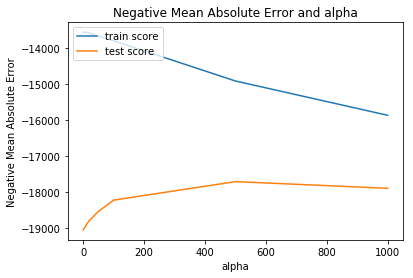

In [138]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [139]:
model_cv.best_params_

{'alpha': 500}

In [140]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
#Extracting the coefficients and model equation from lasso regression
lasso.coef_

array([-2.22393511e+03,  7.20800849e+03,  1.27668185e+04,  6.00846709e+03,
        1.30679792e+04,  0.00000000e+00,  6.37394487e+03, -1.74301056e+03,
        2.77838157e+04,  6.50183964e+03,  0.00000000e+00,  1.60541622e+03,
        1.67049004e+03, -4.78808165e+03, -4.34095821e+03,  7.27519756e+02,
        6.35268330e+02,  5.69120441e+03,  2.11964599e+02,  6.50688400e+02,
       -0.00000000e+00, -1.10089100e+03,  3.53765357e+03,  0.00000000e+00,
        0.00000000e+00,  3.34687174e+02,  4.30130805e+03, -3.71777680e+01,
        2.23945253e+03,  0.00000000e+00,  2.06878651e+03, -2.92803982e+02,
        4.20563286e+01, -6.99608187e+02,  1.06324519e+03, -1.89110124e+03,
        1.11737866e+01, -2.15928241e+02,  2.04299805e+03, -1.14501153e+03,
       -7.55795130e+02, -5.63015672e+02,  4.04424193e+02, -4.77705851e+03,
       -1.02765903e+03,  3.08552051e+03, -1.63464674e+03, -1.66160171e+03,
        3.06360780e+02, -2.13173849e+03, -2.40376928e+03, -1.99776823e+03,
        6.01748220e+03,  

In [142]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print(list(zip(cols, model_parameters)))



[('constant', 180632.3), ('MSSubClass', -2223.9), ('LotArea', 7208.0), ('OverallQual', 12766.8), ('OverallCond', 6008.5), ('TotalBsmtSF', 13068.0), ('1stFlrSF', 0.0), ('2ndFlrSF', 6373.9), ('LowQualFinSF', -1743.0), ('GrLivArea', 27783.8), ('BsmtFullBath', 6501.8), ('BsmtHalfBath', 0.0), ('FullBath', 1605.4), ('HalfBath', 1670.5), ('BedroomAbvGr', -4788.1), ('KitchenAbvGr', -4341.0), ('TotRmsAbvGrd', 727.5), ('Fireplaces', 635.3), ('GarageCars', 5691.2), ('GarageArea', 212.0), ('WoodDeckSF', 650.7), ('OpenPorchSF', -0.0), ('EnclosedPorch', -1100.9), ('PoolArea', 3537.7), ('MiscVal', 0.0), ('MoSold', 0.0), ('YrSold', 334.7), ('MSZoning_FV', 4301.3), ('MSZoning_RH', -37.2), ('MSZoning_RL', 2239.5), ('MSZoning_RM', 0.0), ('Street_Pave', 2068.8), ('LotShape_IR2', -292.8), ('LotShape_IR3', 42.1), ('LotShape_Reg', -699.6), ('LandContour_HLS', 1063.2), ('LandContour_Low', -1891.1), ('LandContour_Lvl', 11.2), ('Utilities_NoSeWa', -215.9), ('LotConfig_CulDSac', 2043.0), ('LotConfig_FR2', -1145.

In [196]:
# model with optimal alpha
# lasso regression
lm1 = Lasso(alpha=100)
lm1.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm1.predict(X_train)
y_test_pred = lm1.predict(X_test)


# Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.7074620132922662


In [144]:
#AIC and BIC Calculation
n= 1016 # n is equal to total datapoints on which model is built
k= 100 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:870336927998.9918
AIC:21097.613900952383
BIC:21589.976763766226


#### The optimal value of alpha value used in the Lasso regression is 100

## Ridge Regression

In [145]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y = housing['SalePrice']

In [146]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  YearBuilt  \
0      CollgCr       Norm       Norm     1Fam     2Story  2001-2010   
1       Others      Feedr       Norm     1Fam     1Story  1951-1975   
2      CollgCr       Norm       Norm     1Fam     2Story  1991-2000   
3      Crawfor       Norm       Norm     1Fam     2Story  1872-1925   
4      NoRidge       Norm       Norm     1Fam     2Story  1991-2000   

  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0    2001-2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1    1951-1975     Gable  CompShg     MetalSd     MetalSd       None   
2    2001-2010     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3    1951-1975     Gable  CompShg     Wd Sdng     Wd Shng       None   
4    1991-2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtExposure Heating HeatingQC  \
0        Gd        TA      PConc       Gd           No    GasA        Ex   
1        TA        TA     CBlock       Gd           Gd    GasA        Ex   
2        Gd        TA      PConc       Gd           Mn    GasA        Ex   
3        TA        TA     BrkTil       TA           No    GasA        Gd   
4        Gd        TA      PConc       Gd           Av    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageCond PavedDrive SaleType SaleCondition  
0         OK          Y       WD        Normal  
1         OK          Y       WD        Normal  
2         OK          Y       WD        Normal  
3         OK          Y       WD       Abnorml  
4         OK          Y       WD        Normal

In [147]:
# convert categorical variables into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_Mitchel  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Others  \
0                     0                     0                    0   
1                     0                     0                    1   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Timber  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                    0                 0                1       

In [148]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [149]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [150]:
X.shape

(1452, 199)

In [151]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=199)

In [152]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [153]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.011253      0.010292         0.000000        0.000000      0.0001   
1       0.004618      0.000808         0.002471        0.002021       0.001   
2       0.003828      0.001015         0.001002        0.001554        0.01   
3       0.005874      0.001337         0.000000        0.000000        0.05   
4       0.004691      0.002395         0.001607        0.001968         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21785.813619      -18681.865817      -19527.734469   
1   {'alpha': 0.001}      -21785.635164      -18681.718415      -19527.649246   
2    {'alpha': 0.01}      -21783.852830      -18680.258680      -19526.797320   
3    {'alpha': 0.05}      -21775.980441      -18674.067554      -19523.017869   
4     {'alpha': 0.1}      -21766.253122      -18666.939829      -19518.310801   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -16331.988146      -19013.374529    -19070.830176     1746.827191   
1      -16331.566264      -19013.331636    -19070.655002     1746.906053   
2      -16327.442606      -19012.903080    -19068.925708     1747.665266   
3      -16310.939598      -19011.006143    -19061.676512     1750.476611   
4      -16293.554688      -19008.651473    -19053.414730     1752.993459   

   rank_test_score  split0_train_score  split1_train_score  \
0               27       -12776.829002       -13721.608036   
1               26       -12776.857379       -13721.594822   
2               25       -12777.139829       -13721.463995   
3               24       -12778.367140       -13720.909978   
4               23       -12779.840935       -13720.385868   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13578.955139       -14374.039168       -13309.901804   
1       -13578.945655       -14374.052878       -13309.891440   
2       -13578.850633       -14374.183377       -13309.788476   
3       -13578.424483       -14374.637069       -13309.345126   
4       -13577.883846       -14375.031326       -13308.820982   

   mean_train_score  std_train_score  
0     -13552.266630       522.444852  
1     -13552.268435       522.440750  
2     -13552.285262       522.398087  
3     -13552.336759       522.177978  
4     -13552.392592       521.875315

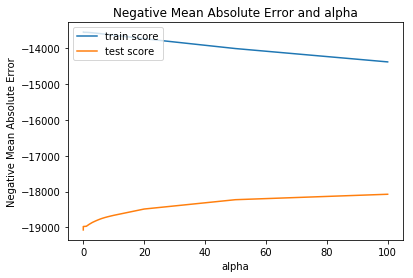

In [154]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [155]:
model_cv.best_params_

{'alpha': 100}

In [156]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#Predictor Variables from the Model built using Ridge Regression:
ridge.coef_

array([-2.46247013e+03,  7.47473999e+03,  1.24766313e+04,  5.93965525e+03,
        1.30343770e+04,  6.73520376e+03,  1.49858220e+04, -6.90187108e+02,
        1.73105419e+04,  6.63656182e+03,  1.12705647e+02,  2.38376222e+03,
        2.20431501e+03, -4.93331333e+03, -3.95780605e+03,  1.59880991e+03,
        8.20933654e+02,  5.32641136e+03,  7.13672220e+02,  5.87264602e+02,
       -2.05591837e+02, -1.12462115e+03,  3.59834979e+03,  6.98680125e+02,
        3.52824467e+01,  3.83356546e+02,  6.42938506e+03,  7.17382185e+02,
        5.48776347e+03,  2.48568432e+03,  2.08632173e+03, -4.44020018e+02,
        1.51074503e+02, -7.47384529e+02,  1.09386797e+03, -2.27187477e+03,
        1.28698648e+02, -2.17104865e+02,  2.07777230e+03, -1.37751780e+03,
       -8.70859401e+02, -8.78529107e+02,  8.77077173e+02, -4.92352647e+03,
       -2.90157334e+03,  2.58386940e+03, -2.89588644e+03, -3.16959195e+03,
        5.30103505e+02, -3.25846880e+03, -4.63376628e+03, -3.41996761e+03,
        5.17027082e+03,  

In [157]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
#Predictor Variables from the Model built using Ridge Regression:

[('constant', 180714.414),
 ('MSSubClass', -2462.47),
 ('LotArea', 7474.74),
 ('OverallQual', 12476.631),
 ('OverallCond', 5939.655),
 ('TotalBsmtSF', 13034.377),
 ('1stFlrSF', 6735.204),
 ('2ndFlrSF', 14985.822),
 ('LowQualFinSF', -690.187),
 ('GrLivArea', 17310.542),
 ('BsmtFullBath', 6636.562),
 ('BsmtHalfBath', 112.706),
 ('FullBath', 2383.762),
 ('HalfBath', 2204.315),
 ('BedroomAbvGr', -4933.313),
 ('KitchenAbvGr', -3957.806),
 ('TotRmsAbvGrd', 1598.81),
 ('Fireplaces', 820.934),
 ('GarageCars', 5326.411),
 ('GarageArea', 713.672),
 ('WoodDeckSF', 587.265),
 ('OpenPorchSF', -205.592),
 ('EnclosedPorch', -1124.621),
 ('PoolArea', 3598.35),
 ('MiscVal', 698.68),
 ('MoSold', 35.282),
 ('YrSold', 383.357),
 ('MSZoning_FV', 6429.385),
 ('MSZoning_RH', 717.382),
 ('MSZoning_RL', 5487.763),
 ('MSZoning_RM', 2485.684),
 ('Street_Pave', 2086.322),
 ('LotShape_IR2', -444.02),
 ('LotShape_IR3', 151.075),
 ('LotShape_Reg', -747.385),
 ('LandContour_HLS', 1093.868),
 ('LandContour_Low', -2271

In [158]:
# model with optimal alpha
# Ridge regression
lm2 = Ridge(alpha=10)

lm2.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm2.predict(X_train)
y_test_pred = lm2.predict(X_test)


#New Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.7033121479837348


In [159]:
#AIC and BIC Calculation
n= 1016 # n is equal to total datapoints on which model is built
k= 50 # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:882683293901.3635
AIC:21011.92533331323
BIC:21258.10676472015


#### The optimal value of alpha value used in Ridge regression is 10

#### The below parameters are the key drivers for  price of a house in Autralia

('GrLivArea', 17310.542), 
('2ndFlrSF', 14985.822), 
('TotalBsmtSF', 13034.377), 
('OverallQual', 12476.631),
('YearBuilt_2001-2010', 8325.093),
('LotArea', 7474.74),
('YearBuilt_1991-2000', 6848.351), 
('SaleType_New', 6641.614), 
('1stFlrSF', 6735.204),
('BsmtQual_Others', 6702.736),
('BsmtFullBath', 6636.562), 
('MSZoning_FV', 6429.385), 
('OverallCond', 5939.655), 
('MSZoning_RL', 5487.763), 
('GarageCars', 5326.411),
('Neighborhood_NoRidge', 5170.271),
('Condition1_Norm', 5249.022), 
('GarageFinish_No Garage', 5056.845)
